In [1]:
from scipy.interpolate import interp1d  # это чтобы нарисовать сглаженную кривую
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
style.use('ggplot')

In [2]:
import urllib.request  # импортируем модуль
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# вообще значения параметров удобнее хранить в переменных и подставлять в шаблон запроса
req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-20601736&offset=18&count=150&v=5.92&access_token=e5ece68ee5ece68ee5ece68ea6e5850abfee5ece5ece68eb95c63f90f3813e53ece6d9b') 

# да, так тоже можно, не обязательно делать это с with, как в примере выше
response = urllib.request.urlopen(req) 
result = response.read().decode('utf-8')

In [3]:
print(result)

{"response":{"count":1538,"items":[{"id":366772,"from_id":-20601736,"owner_id":-20601736,"date":1552897932,"marked_as_ads":0,"post_type":"post","text":"Сегодня будет что-то интересное. 😏","copy_history":[{"id":112472,"owner_id":-31462139,"from_id":-31462139,"date":1552816803,"post_type":"post","text":"По всей видимости, эпизод «Шрамы» станет очень важным событием. В предстоящей серии «Ходячих мертвецов» мы узнаем, что происходило с Мишонн после потери Рика.\n\nКак думаете, что мы узнаем завтра?","attachments":[{"type":"photo","photo":{"id":456245982,"album_id":-7,"owner_id":-31462139,"user_id":100,"sizes":[{"type":"m","url":"https:\/\/pp.userapi.com\/c855424\/v855424414\/40a7\/2z3koJlQmMY.jpg","width":130,"height":130},{"type":"o","url":"https:\/\/pp.userapi.com\/c855424\/v855424414\/40ab\/sZi1_CY_AS8.jpg","width":130,"height":130},{"type":"p","url":"https:\/\/pp.userapi.com\/c855424\/v855424414\/40ac\/rvpYQEQrWl0.jpg","width":200,"height":200},{"type":"q","url":"https:\/\/pp.userapi.c

In [4]:
type(result)

str

In [5]:
import json
#data = requests.get(result).json()
data = json.loads(result) 
print(type(data))

<class 'dict'>


In [6]:
data['response']['items']

[{'id': 366772,
  'from_id': -20601736,
  'owner_id': -20601736,
  'date': 1552897932,
  'marked_as_ads': 0,
  'post_type': 'post',
  'text': 'Сегодня будет что-то интересное. 😏',
  'copy_history': [{'id': 112472,
    'owner_id': -31462139,
    'from_id': -31462139,
    'date': 1552816803,
    'post_type': 'post',
    'text': 'По всей видимости, эпизод «Шрамы» станет очень важным событием. В предстоящей серии «Ходячих мертвецов» мы узнаем, что происходило с Мишонн после потери Рика.\n\nКак думаете, что мы узнаем завтра?',
    'attachments': [{'type': 'photo',
      'photo': {'id': 456245982,
       'album_id': -7,
       'owner_id': -31462139,
       'user_id': 100,
       'sizes': [{'type': 'm',
         'url': 'https://pp.userapi.com/c855424/v855424414/40a7/2z3koJlQmMY.jpg',
         'width': 130,
         'height': 130},
        {'type': 'o',
         'url': 'https://pp.userapi.com/c855424/v855424414/40ab/sZi1_CY_AS8.jpg',
         'width': 130,
         'height': 130},
        {'ty

In [7]:
import re
i = 0
amounts = []
amounts2 = []
dictionary = {}
average = {}
replacement = {}
comparison = {}

lem = open('lem4.txt','w',encoding='utf-8-sig')

RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

for word in str(data['response']['items'][i]):
    text3 = str(data['response']['items'][i]['text']).replace('!','').replace(',','').replace('?','').replace('.','').replace('"','').replace(':','').replace(';','').replace('[','').replace(']','')
    text3 = RE_EMOJI.sub('', text3)
    text33 = re.sub(' ','',text3)
    amounts2.append(len(text33))
    text2 = re.sub(r'—', ' ', str(text3))
    text2 = RE_EMOJI.sub('', text2)
    lst = text2.split()
    for w in lst:
        dictionary[str(w)]=len(w)
        replacement[str(w)]=len(w)
    text = str(data['response']['items'][i]['text'])
    
    print(data['response']['items'][i]['text'])
    print('Число букв ' + str(len(text33)))
    print('Число слов ' + str(len(lst)))
    if len(text33) != 0 or len(lst) != 0:
        print('Средняя длина слова ' + str(len(text33)//len(lst)))
        average[str(i)]=str(len(text33)//len(lst))
    print(' ')
    print(' ')
    print(' ')
    amounts.append(lst)

    lem.write(re.sub('[^а-яёА-ЯЁ ]',' ',text3))
    
    i += 1
    if i == 149:
        break
print(amounts)
total = 0
for lst in amounts:
    print(len(lst))
    total += len(lst)
print('Общее число слов в предложении ' + str(total))
print('Общее число символов в предложении ' + str(sum(amounts2)))
print('Средняя длина слова ' + str(sum(amounts2)//total))


sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

sorted(average.items(), key=lambda x: x[1], reverse=True)

Сегодня будет что-то интересное. 😏
Число букв 28
Число слов 4
Средняя длина слова 7
 
 
 
Давайте обсудим 13 серию «Ходячих мертвецов» по-настоящему, со спойлерами. Пишите все мысли, появившиеся после просмотра. 

🔥ОСТОРОЖНО, В КОММЕНТАРИЯХ ВОЗМОЖНЫ СПОЙЛЕРЫ!🔥

Если вы пропустили новый эпизод, настоятельно рекомендуем не заглядывать в комментарии и посмотреть повтор в воскресенье ночью на FOX.
Число букв 259
Число слов 39
Средняя длина слова 6
 
 
 
Она хочет только одного!

Смотрите новую серию «Ходячих мертвецов» сегодня в 19:00 МСК на FOX.
Число букв 78
Число слов 15
Средняя длина слова 5
 
 
 
Вдохновение, которого нам не хватало в этот Международный женский день. 😎
Число букв 60
Число слов 10
Средняя длина слова 6
 
 
 
Прекрасные дамы, поздравляем вас с праздником 8 марта! 🌷

Как замечательно, что вы все такие разные: сильные, как Мишон, смелые, как Джудит, непоколебимые, как Кэрол, нежные и заботливые, как Лорен. И как прекрасно, что мужчины готовы на все ради вас!
Число букв 19

IndexError: list index out of range

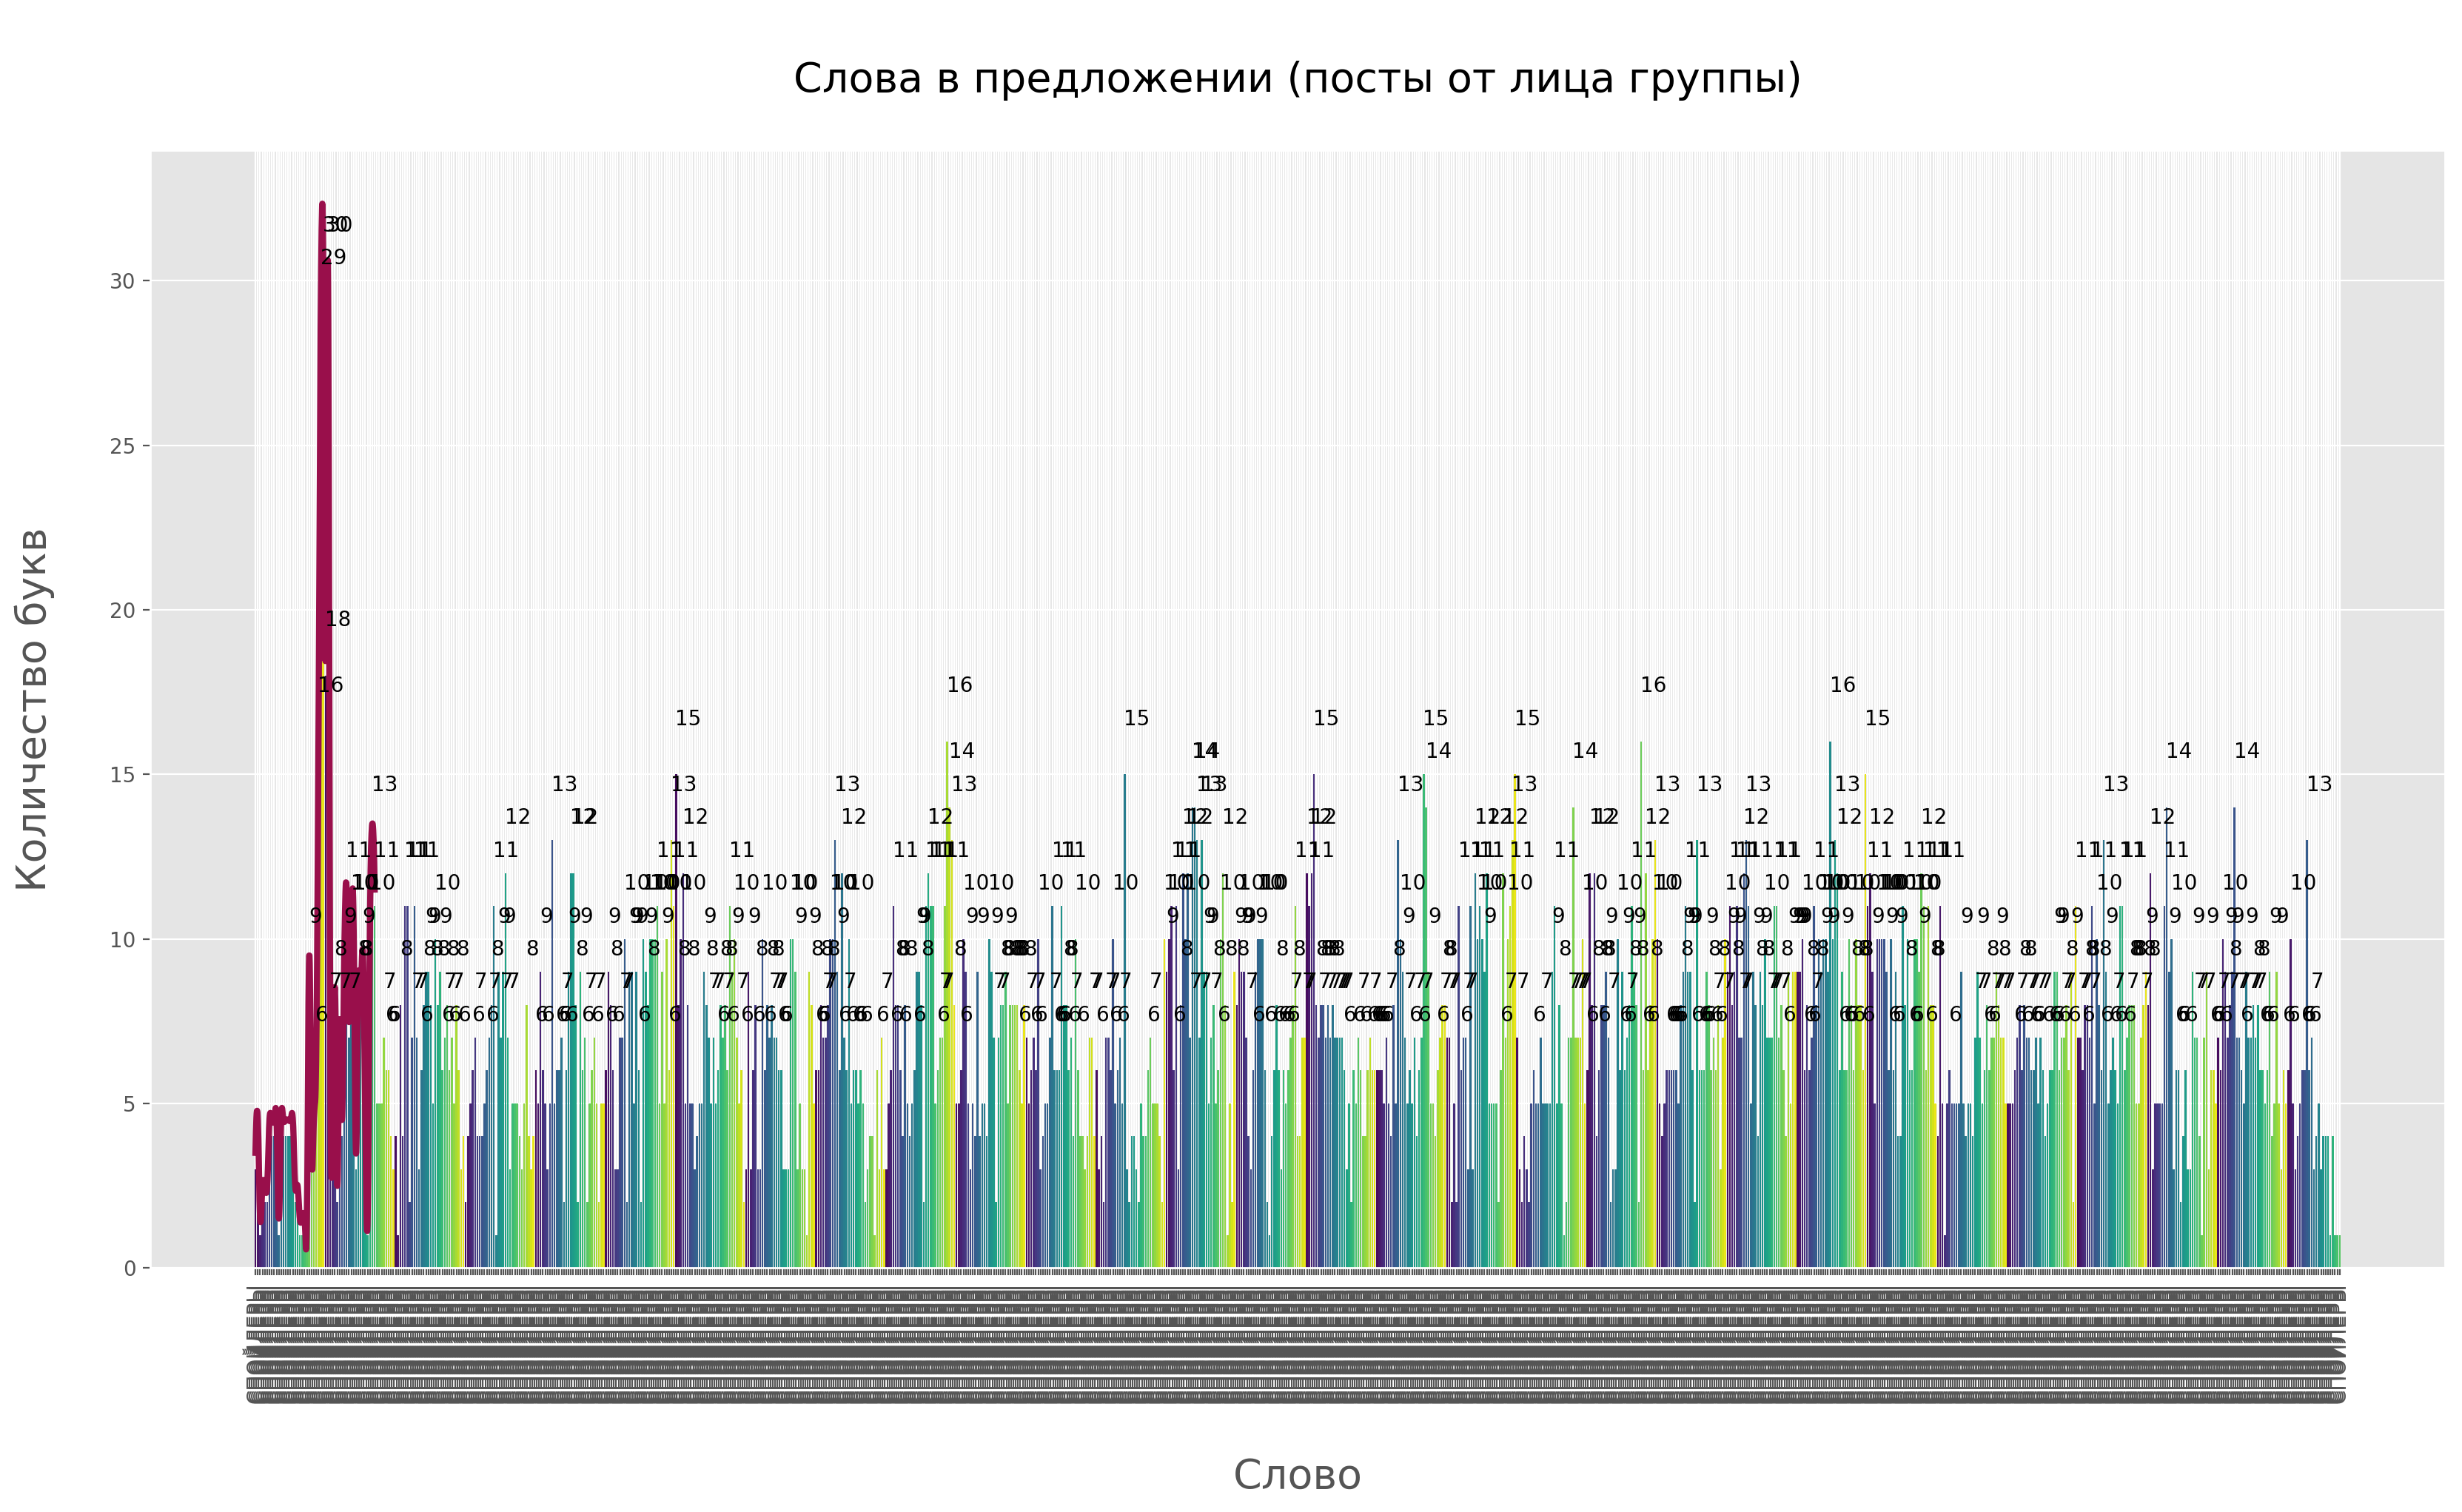

In [8]:
# отсортируем данные по названиям городов
dictionary_nums = [c[1] for c in sorted(dictionary.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
dictionary_labs = sorted([w for dic in dictionary]) # подписи по оси x
x = range(len(dictionary_labs)) # данные по оси x
# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', max(dictionary_nums)) 
f = interp1d(x, [x+0.5 for x in dictionary_nums], kind='quadratic')
x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
y_smooth = f(x_new)
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, dictionary_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')

# рисуем точки максимумов (условных)
for a, b in zip(x, dictionary_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))
        
plt.title('\nСлова в предложении (посты от лица группы)\n',  fontsize=20)
plt.ylabel('Количество букв\n',  fontsize=20)
plt.xlabel('\nСлово',  fontsize=20)
plt.xticks(x, dictionary_labs, rotation=90)
plt.show()

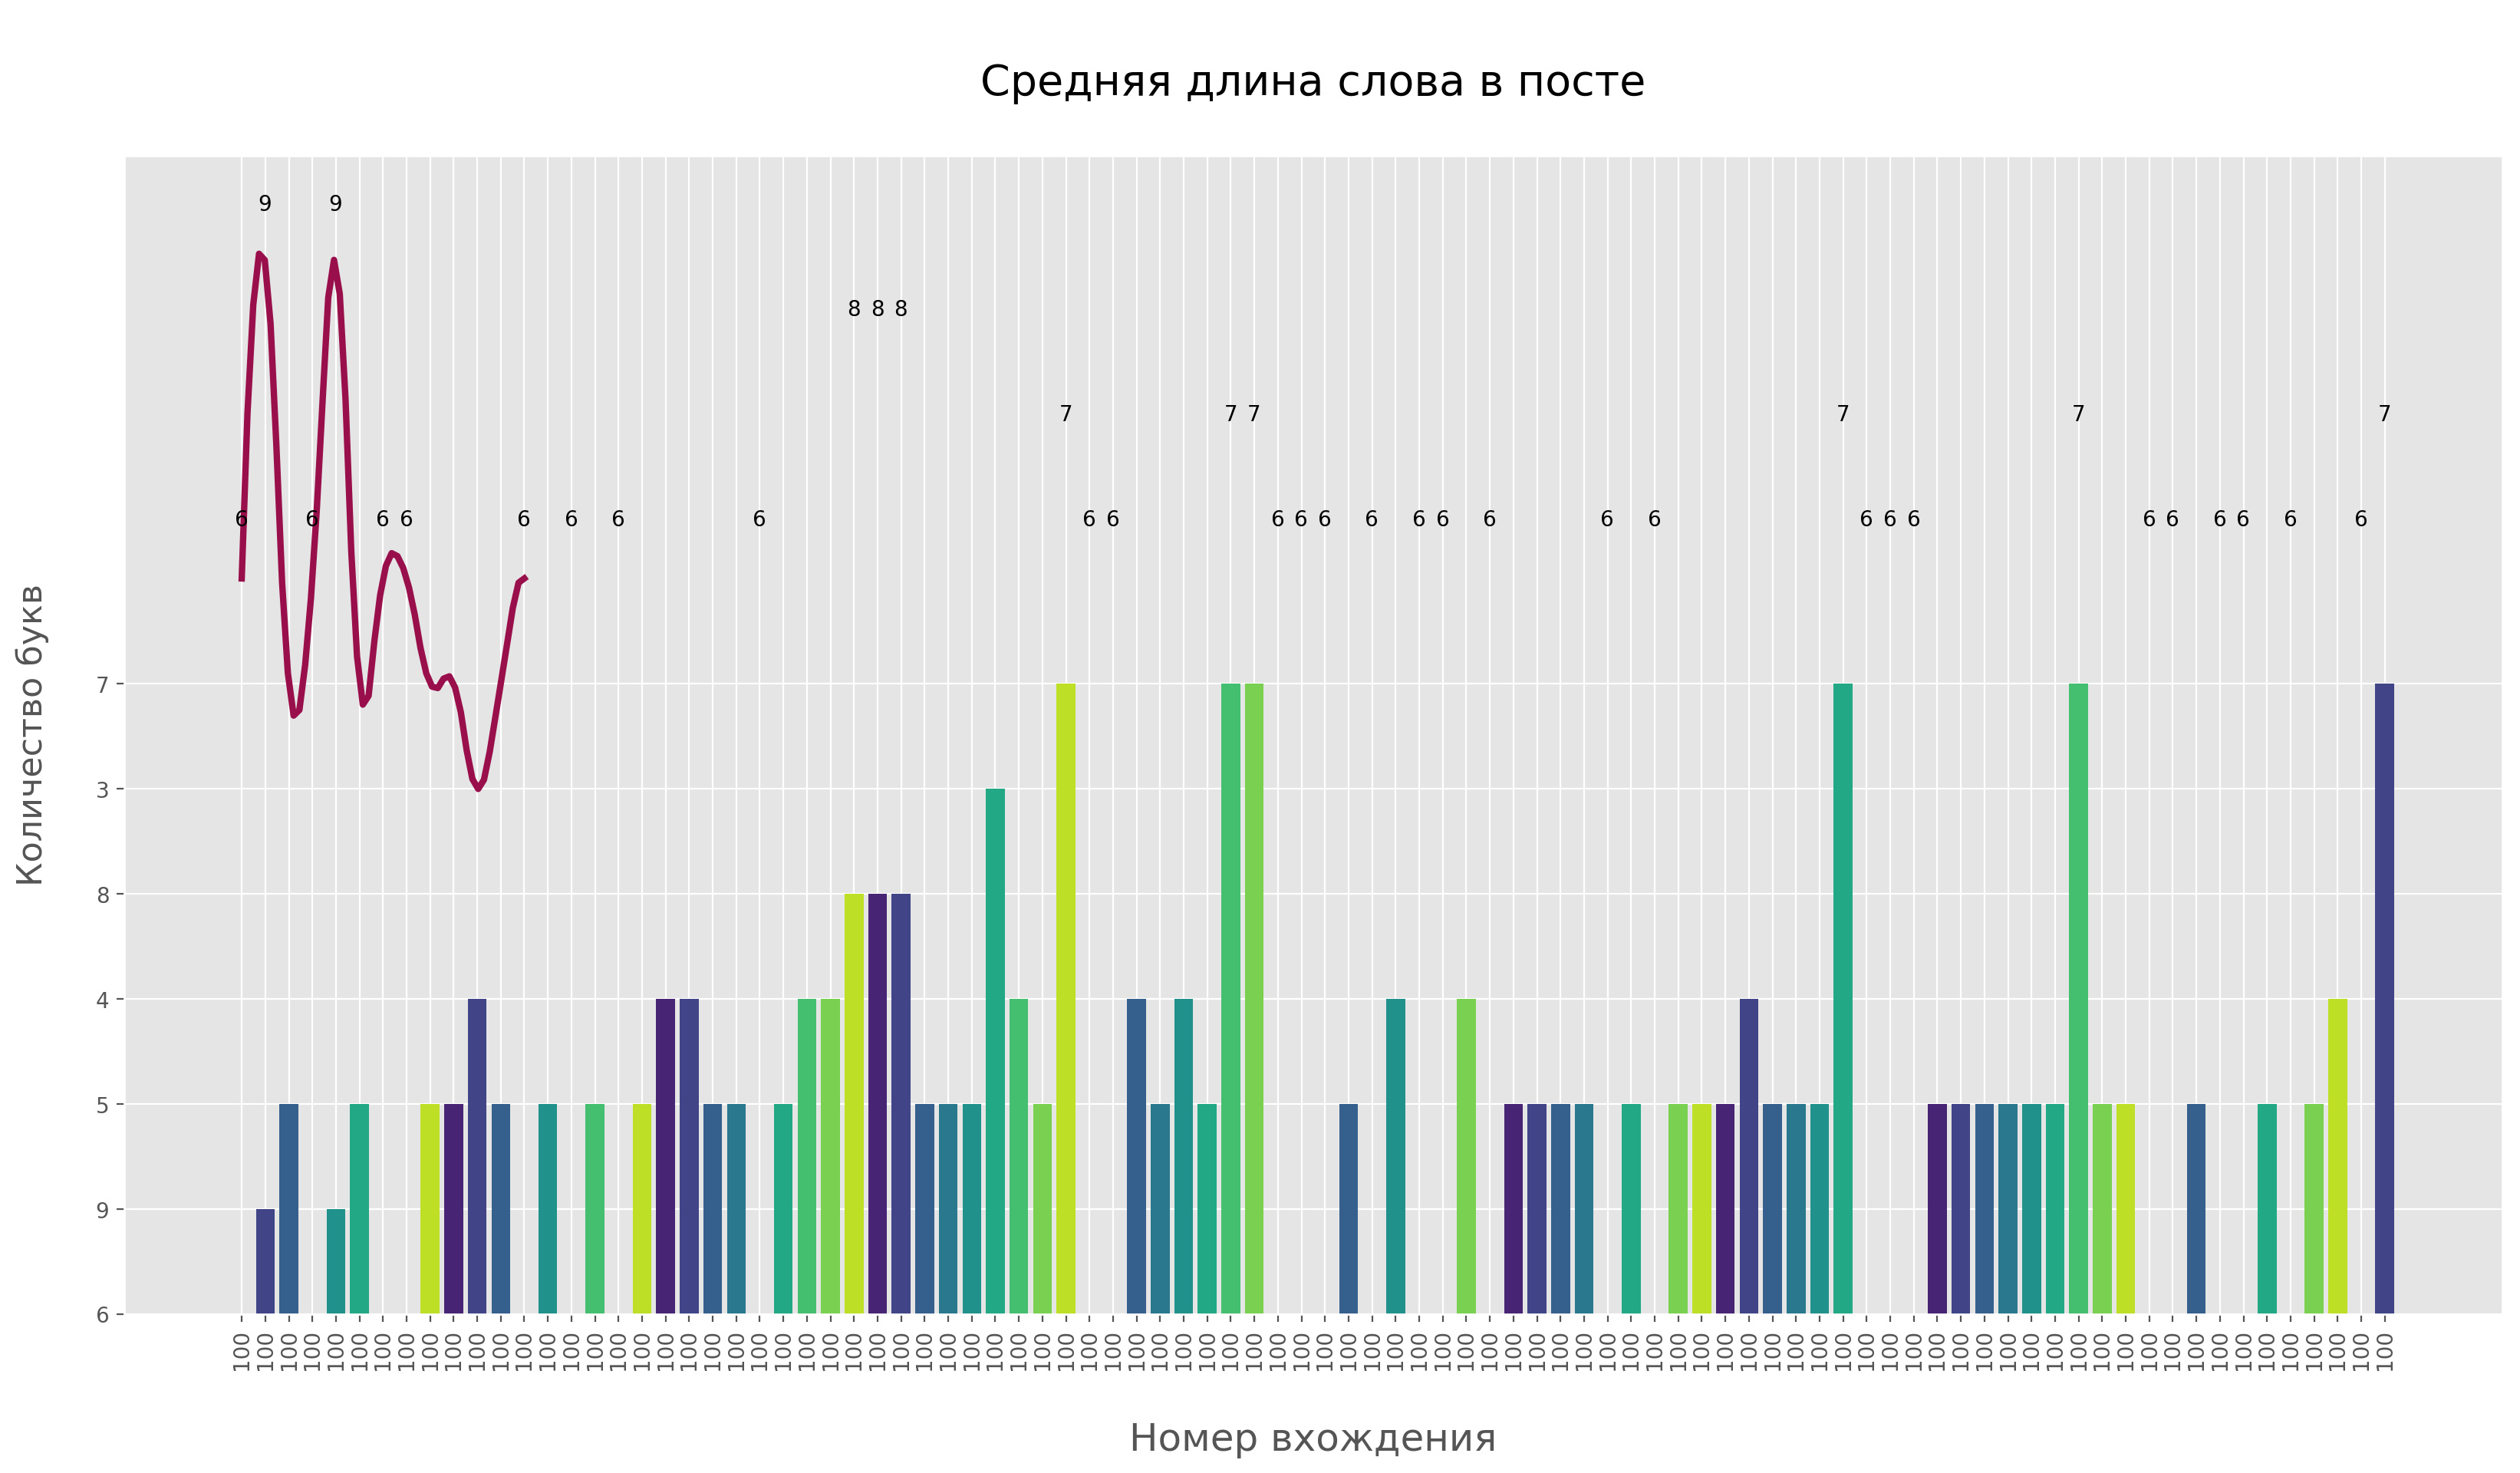

In [9]:
# отсортируем данные по названиям городов
average_nums = [c[1] for c in sorted(average.items(), key=lambda x: x[0], reverse=True)] # данные по оси y
average_labs = sorted([i for aver in average]) # подписи по оси x
x = range(len(average_labs)) # данные по оси x
# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', int(max(average_nums)))
f = interp1d(x, [int(x)+1 for x in average_nums], kind='quadratic')
x_new = np.linspace(0, 12) # тут нужны min и max по оси x
y_smooth = f(x_new)
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, average_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')

# рисуем точки максимумов (условных)
for a, b in zip(x, average_nums):
    if int(b) > 5:
        plt.scatter(a, int(b)+1.5, s=0)
        plt.text(a-0.3, int(b)+1.5, str(b))
        
plt.title('\nСредняя длина слова в посте\n',  fontsize=20)
plt.ylabel('Количество букв\n',  fontsize=16)
plt.xlabel('\nНомер вхождения',  fontsize=18)
plt.xticks(x, average_labs, rotation=90)
plt.show()

In [9]:
req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-20601736&post_id=379674&offset=18&count=150&v=5.92&need_likes=1&access_token=e5ece68ee5ece68ee5ece68ea6e5850abfee5ece5ece68eb95c63f90f3813e53ece6d9b&extended=1')
response = urllib.request.urlopen(req) 
result = response.read().decode('utf-8')
print(result)
type(result)
import json
data = json.loads(result)
print(type(data))
resp = {}


{"response":{"count":1093,"items":[{"id":379693,"from_id":287413964,"post_id":379674,"owner_id":-20601736,"parents_stack":[],"date":1556201021,"text":"Нет","likes":{"count":1,"user_likes":0,"can_like":1},"thread":{"count":0,"items":[],"can_post":true,"show_reply_button":true,"groups_can_post":true}},{"id":379694,"from_id":243351468,"post_id":379674,"owner_id":-20601736,"parents_stack":[],"date":1556201032,"text":"Ставлю себя на место Рика и уверен,что даже в мыслях не было бы варианта с пощадой","likes":{"count":26,"user_likes":0,"can_like":1},"thread":{"count":0,"items":[],"can_post":true,"show_reply_button":true,"groups_can_post":true}},{"id":379695,"from_id":268145905,"post_id":379674,"owner_id":-20601736,"parents_stack":[],"date":1556201037,"text":"ДА ДА ДА","likes":{"count":1,"user_likes":0,"can_like":1},"thread":{"count":0,"items":[],"can_post":true,"show_reply_button":true,"groups_can_post":true}},{"id":379696,"from_id":249659768,"post_id":379674,"owner_id":-20601736,"parents_st

In [10]:
data['response']['items']

[{'id': 379693,
  'from_id': 287413964,
  'post_id': 379674,
  'owner_id': -20601736,
  'parents_stack': [],
  'date': 1556201021,
  'text': 'Нет',
  'likes': {'count': 1, 'user_likes': 0, 'can_like': 1},
  'thread': {'count': 0,
   'items': [],
   'can_post': True,
   'show_reply_button': True,
   'groups_can_post': True}},
 {'id': 379694,
  'from_id': 243351468,
  'post_id': 379674,
  'owner_id': -20601736,
  'parents_stack': [],
  'date': 1556201032,
  'text': 'Ставлю себя на место Рика и уверен,что даже в мыслях не было бы варианта с пощадой',
  'likes': {'count': 26, 'user_likes': 0, 'can_like': 1},
  'thread': {'count': 0,
   'items': [],
   'can_post': True,
   'show_reply_button': True,
   'groups_can_post': True}},
 {'id': 379695,
  'from_id': 268145905,
  'post_id': 379674,
  'owner_id': -20601736,
  'parents_stack': [],
  'date': 1556201037,
  'text': 'ДА ДА ДА',
  'likes': {'count': 1, 'user_likes': 0, 'can_like': 1},
  'thread': {'count': 0,
   'items': [],
   'can_post': 

In [11]:
i = 0
amounts0 = []
amounts20 = []
dictionary0 = {}
average0 = {}
replacement0 = {}
idd = []
f = open('table_file2.csv', 'w', encoding = 'utf-8-sig')
f.write("Id; Text; Date; Likes\n")


for word in str(data['response']['items'][i]):
    text3 = str(data['response']['items'][i]['text']).replace('!','').replace(',','').replace('?','').replace('.','').replace('"','').replace(':','').replace(';','').replace('[','').replace(']','')
    text3 = RE_EMOJI.sub('', text3)
    text33 = re.sub(' ','',text3)
    amounts20.append(len(text33))
    text2 = re.sub(r'—', ' ', str(text3))
    text2 = RE_EMOJI.sub('', text2)
    lst = text2.split()
    for w in lst:
        dictionary0[str(w)]=len(w)
        replacement0[str(w)]=len(w)
    text = str(data['response']['items'][i]['text'])

    print(data['response']['items'][i]['text'])
    print('Число букв ' + str(len(text33)))
    print('Число слов ' + str(len(lst)))
    if len(text3) != 0 or len(lst) != 0:
        print('Средняя длина слова ' + str(len(text33)//len(lst)))
        average0[str(i)]=str(len(text33)//len(lst))
    print(' ')
    print(' ')
    print(' ')
    amounts0.append(lst)
    
    
    user_id = str(data['response']['items'][i]['id'])
    date = str(data['response']['items'][i]['date'])
    likes = str(data['response']['items'][i]['likes'])
    f.write('%s; %s; %s; %s\n' % (str(data['response']['items'][i]['id']), str(text2).replace('\n',''), str(data['response']['items'][i]['date']), str(data['response']['items'][i]['likes']['count'])))
    idd.append(user_id)
    
    i += 1
    
    if i == 149:
        break
        
print(amounts0)
total0 = 0
for lst in amounts0:
    print(len(lst))
    total0 += len(lst)
print('Общее число слов в предложении ' + str(total0))
print('Общее число символов в предложении ' + str(sum(amounts20)))
print('Средняя длина слова ' + str(sum(amounts20)//total0))

sorted(dictionary0.items(), key=lambda x: x[1], reverse=True)

sorted(average0.items(), key=lambda x: x[1], reverse=True)

print(idd)

Нет
Число букв 3
Число слов 1
Средняя длина слова 3
 
 
 
Ставлю себя на место Рика и уверен,что даже в мыслях не было бы варианта с пощадой
Число букв 66
Число слов 16
Средняя длина слова 4
 
 
 
ДА ДА ДА
Число букв 6
Число слов 3
Средняя длина слова 2
 
 
 
"Никто не считает себя злодеем"
Ниган
Число букв 31
Число слов 6
Средняя длина слова 5
 
 
 
Конечно
Число букв 7
Число слов 1
Средняя длина слова 7
 
 
 
Да
Число букв 2
Число слов 1
Средняя длина слова 2
 
 
 
простить можно, а забыть нельзя
Число букв 26
Число слов 5
Средняя длина слова 5
 
 
 
Почему нет?
Рик убил его людей 
Он убил Рика людей 
Вы просто привыкли  к ним так же как и я 
Было обидно 
Но справедливо 🤷‍♂️
Число букв 100
Число слов 25
Средняя длина слова 4
 
 
 
Нет и сразу завалилбы, не сюсюкаясь
Число букв 29
Число слов 6
Средняя длина слова 4
 
 
 
Да, когда новый сезон?
Число букв 17
Число слов 4
Средняя длина слова 4
 
 
 
Естественно. Банда Рика сама напросилась, в себя поверили.
Число букв 48
Число слов 8
Ср

IndexError: list index out of range

In [13]:
# отсортируем данные по названиям городов
dictionary0_nums = [c[1] for c in sorted(dictionary0.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
dictionary0_labs = sorted([w for dic0 in dictionary0]) # подписи по оси x
x = range(len(dictionary0_labs)) # данные по оси x

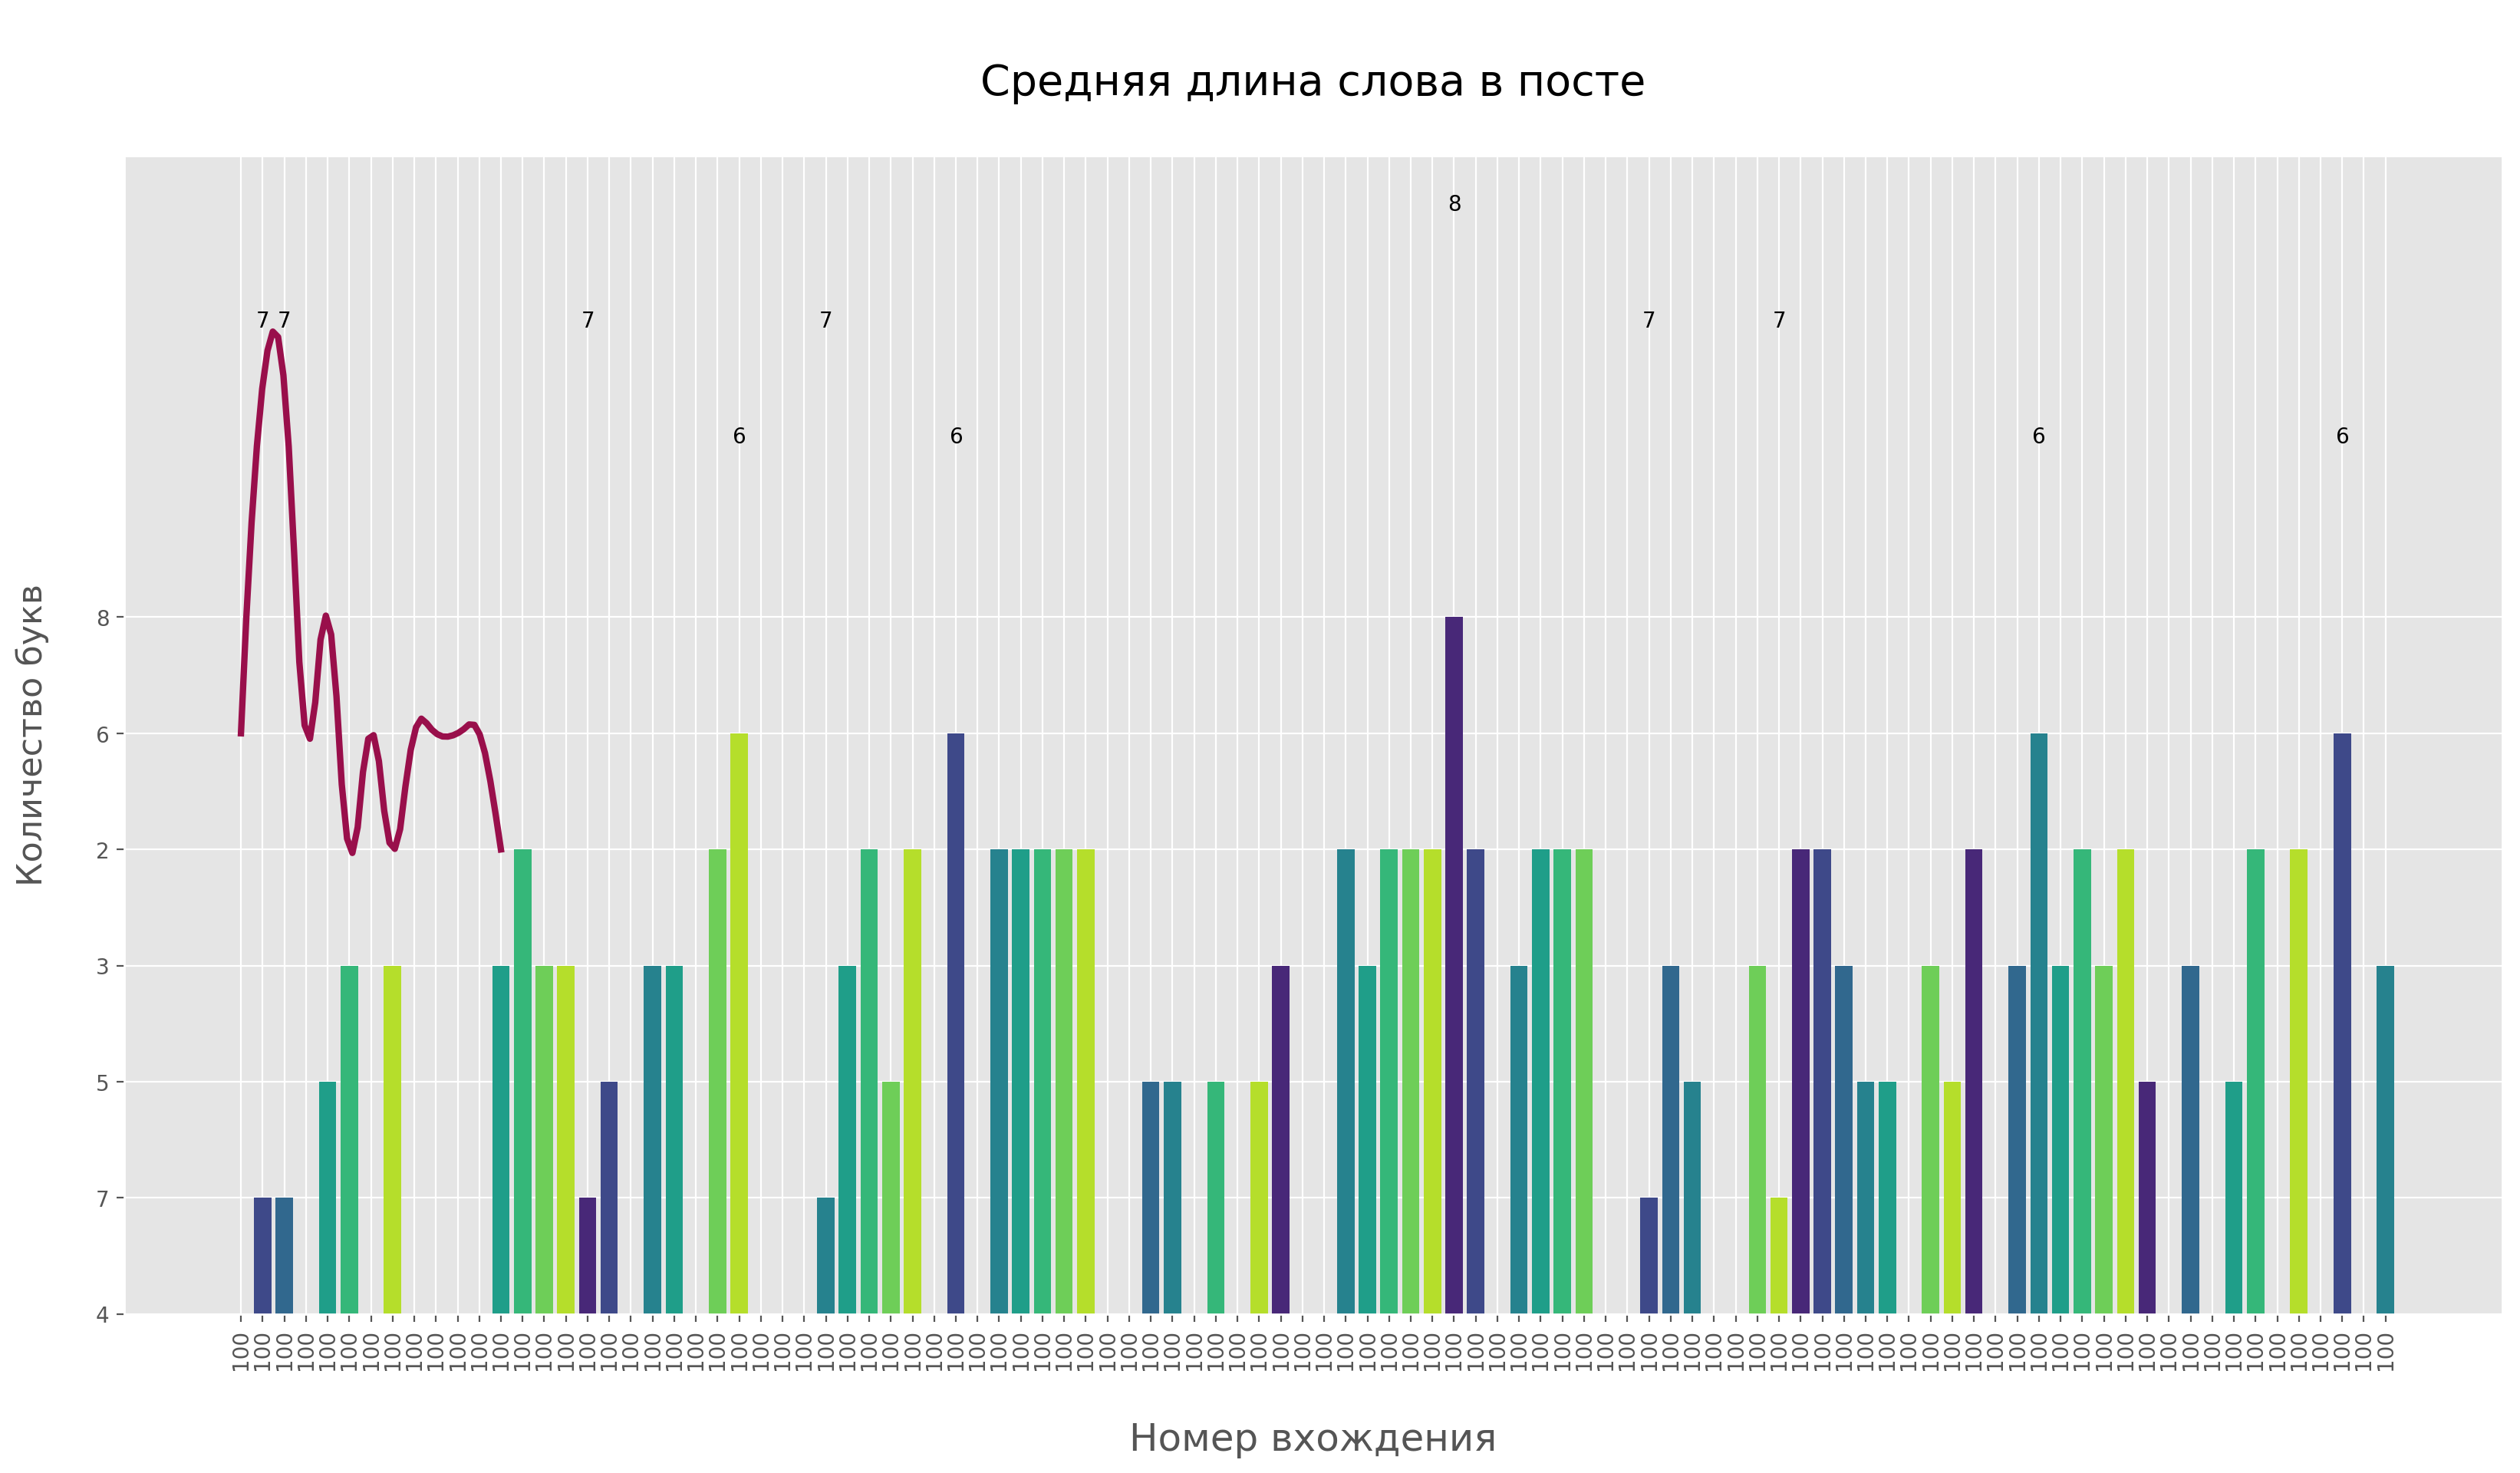

In [14]:
# отсортируем данные по названиям городов
average0_nums = [c[1] for c in sorted(average0.items(), key=lambda x: x[0], reverse=True)] # данные по оси y
average0_labs = sorted([i for aver in average0]) # подписи по оси x
x = range(len(average0_labs)) # данные по оси x
# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', int(max(average0_nums)))
f = interp1d(x, [int(x)+1 for x in average0_nums], kind='quadratic')
x_new = np.linspace(0, 12) # тут нужны min и max по оси x
y_smooth = f(x_new)
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, average0_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')

# рисуем точки максимумов (условных)
for a, b in zip(x, average0_nums):
    if int(b) > 5:
        plt.scatter(a, int(b)+1.5, s=0)
        plt.text(a-0.3, int(b)+1.5, str(b))
        
plt.title('\nСредняя длина слова в посте\n',  fontsize=20)
plt.ylabel('Количество букв\n',  fontsize=16)
plt.xlabel('\nНомер вхождения',  fontsize=18)
plt.xticks(x, average0_labs, rotation=90)
plt.show()

In [15]:
cities = []
bdays = []
fnames = []
lnames = []
deacts = []
ids = []

In [16]:
users = set()
offsets = [0, 1000, 2000, 3000, 4000]
token = 'e5ece68ee5ece68ee5ece68ea6e5850abfee5ece5ece68eb95c63f90f3813e53ece6d9b'
version = '5.92'
group = 'twd_russia'

for off in offsets:
    req = urllib.request.Request('https://api.vk.com/method/groups.getMembers?group_id=%s&access_token=%s&v=%s&offset=%s'  % (group, token, version, off))
    response = urllib.request.urlopen(req)
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    users = users | set(data['response']['items'])
len(users)

5000

In [18]:
#bdays = []
i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=bdate'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'bdate' not in (data['response'][0]):
        bdays.append('unknown')
    else:
        bdays.append(data['response'][0]['bdate'])
    i += 1
print(len(bdays))

150


In [19]:
print(bdays)

['23.7.1988', '2.11', '28.11.1983', '19.5', '16.1.1990', '11.2', '14.9.1987', 'unknown', '9.4.1984', '8.4.1989', '28.10', '21.4', '21.12.1986', '28.1.1990', '7.12', '10.4.1988', '11.5', '19.1', 'unknown', '6.11', '23.10', '29.1', '2.4', '20.9.1920', 'unknown', '1.8.1990', '28.1.1992', '9.3.1968', '14.11.1985', 'unknown', '24.2', '27.10', '14.6', '23.7', '12.2.1988', '29.7.1986', 'unknown', 'unknown', '2.2.1987', '2.12', '8.2', '29.8', '23.1.1990', '23.9', '25.1', 'unknown', '22.10.1988', '19.12', '3.3.1992', '22.5.1984', '1.2', '21.12.1993', 'unknown', '14.5.1987', '17.10', '3.2.1984', 'unknown', '26.10.1989', 'unknown', '28.12.1987', '26.12', '15.3', '9.2', 'unknown', 'unknown', 'unknown', '21.12.1910', '9.1.1990', '27.5.1991', '6.10.1985', 'unknown', '30.4.1988', '12.3', '23.7', '14.5.1992', '8.6', '12.10.1988', '8.11', 'unknown', '20.5.1990', '14.4', '15.7', 'unknown', '9.9', '13.12.1985', '15.2.1982', 'unknown', '9.12.1982', 'unknown', '7.3', '2.10.1984', '11.9.1988', '21.3', '21.3

In [20]:
cities = []
i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=home_town'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'home_town' not in (data['response'][0]):
        cities.append('unknown')
    else:
        cities.append(data['response'][0]['home_town'])
    i += 1
print(len(cities))

150


In [21]:
print(cities)

['unknown', 'unknown', 'unknown', 'unknown', 'Санкт-Петербург', 'Питер', 'unknown', 'unknown', 'unknown', 'Россия', 'unknown', 'unknown', 'Санкт-Петербург', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'Черноголовка', 'unknown', 'unknown', 'unknown', 'Санкт-Петербург', '', 'Санкт-Петербург', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'Грозный', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'Ленинград', 'unknown', 'Екатеринбург', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'ShitCity', 'unknown', 'unknown', 'unknown', 'unknown', 'Москва', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'Балашиха', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknow

In [22]:
u = open('user_information45.csv', 'w', encoding = 'utf-8-sig')
u.write("First name; Last name; Sex; Birthday; Home town; Id\n")


52

In [23]:
fnames = []
lnames = []
i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=first_name,last_name'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'first_name' not in (data['response'][0]):
        fnames.append('unknown')
    else:
        fnames.append(data['response'][0]['first_name'])
    if 'last_name' not in (data['response'][0]):
        lnames.append('unknown')
    else:
        lnames.append(data['response'][0]['last_name'])
    i += 1
print(len(fnames))
print(len(lnames))

150
150


In [24]:
print(fnames)
print()
print()
print()
print(lnames)

['Dmitry', 'Regina', 'Konstantin', 'Alexandra', 'Viktoria', 'Kirill', 'Mikhail', 'Natalia', 'Ekaterina', 'Shamil', 'Alexander', 'Olga', 'Andrey', 'Anatoly', 'Olga', 'Igor', 'Darya', 'Ekaterina', 'Natasha', 'Artyom', 'Irina', 'Lida', 'Dmitry', 'David', 'Maria', 'Regina', 'Vladislav', 'Ivan', 'Daniil', 'Daniella', 'Yulia', 'Alyona', 'Romario', 'Mikhail', 'Sergey', 'Maria', 'Valentin', 'Slava', 'Artem', 'Yulia', 'Mikhail', 'Liza', 'Evgenia', 'Natasha', 'Olga', 'Vera', 'Irina', 'Alya', 'Stas', 'Lars', 'Sergey', 'Ekaterina', 'Evgeny', 'Igor', 'Oleg', 'Rustam', 'Ekaterina', 'Max', 'Sanya', 'Pavel', 'Vadim', 'Darya', 'Anastasia', 'Yulya', 'Alexey', 'Dmitry', 'Vera', 'Alexander', 'Alexander', 'Mikhail', 'Evgeny', 'Andrey', 'Nastyushka', 'Mikhail', 'Katya', 'Yulya', 'Paul', 'Oksana', 'Sergey', 'Regina', 'Larisa', 'Ekaterina', 'Anna', 'Alexander', 'Ren', 'Ekaterina', 'Mila', 'Yulia', 'Oksana', 'Anastasia', 'Gleb', 'Olga', 'Irina', 'Roman', 'Yulia', 'Anna', 'Viktor', 'Nadezhda', 'Ivan', 'Ekaterin

In [25]:
countries = []

i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=country'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'country' not in (data['response'][0]):
        countries.append('unknown')
    else:
        countries.append(data['response'][0]['country']['title'])
    i += 1
print(len(countries))


150


In [26]:
print(countries)

['Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'South Korea', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'unknown', 'Russia', 'unknown', 'Ukraine', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'United Kingdom', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Belgium', 'Ir

In [27]:
ids = []

i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=id'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'id' not in (data['response'][0]):
        ids.append('unknown')
    else:
        ids.append(data['response'][0]['id'])
    i += 1
print(len(ids))


150


In [28]:
print(ids)

[1490944, 1892353, 1925121, 2703362, 442372, 565256, 221196, 3448846, 761871, 794640, 245777, 647186, 1318928, 1523728, 1081365, 1884178, 1359895, 2252820, 3063832, 3080220, 1785885, 1851421, 2498601, 1294378, 655403, 1114155, 2015279, 2793522, 1327155, 172086, 475194, 434235, 2302011, 2850879, 3186752, 1572931, 163909, 778309, 172103, 2105413, 2588753, 1155154, 2359378, 2662483, 3121237, 2318424, 1163360, 2359394, 2572391, 401512, 2396766, 458858, 2244715, 2818156, 3113068, 1745006, 3293293, 41072, 393329, 1040496, 688241, 1433714, 1572981, 1941621, 2744432, 1278072, 57465, 2695290, 1310843, 860285, 2556034, 1450115, 1671300, 311429, 1704069, 1097863, 147592, 1663112, 2236552, 1056908, 196749, 1794188, 401551, 1704079, 884881, 581778, 2949261, 3145877, 1351830, 1990806, 360600, 1990807, 3326101, 3047577, 3293339, 114845, 1892510, 491679, 1761442, 1851554, 2269348, 499877, 2072741, 1286312, 49323, 131243, 860333, 1466540, 1532079, 2719915, 532658, 2277554, 3080370, 270518, 2842809, 181

In [29]:
sexes = []
i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=sex'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'sex' not in (data['response'][0]):
        continue
    sexes.append(data['response'][0]['sex'])
    i += 1
print(len(sexes))

150


In [30]:
print(sexes)

[2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2]


In [31]:
i = 0
for iden in ids:
    for c in countries:
        for f in fnames:
            for l in lnames:
                for b in bdays:
                    for cc in cities:
                        u.write(str(fnames[i]) + ';' + str(lnames[i]) + ';' + str(sexes[i]) + ';' + str(bdays[i]) + ';' + str(cities[i]) + ';' + str(ids[i]) + '\n')
                        i += 1
                        if i > 149:
                            break
                            
# К сожалению, здесь ошибки IndexError не избежать - но в файле будут изменения

IndexError: list index out of range

In [37]:
fnames2 = Counter(fnames)

In [38]:
fnames2

Counter({'Dmitry': 5,
         'Regina': 3,
         'Konstantin': 1,
         'Alexandra': 1,
         'Viktoria': 2,
         'Kirill': 2,
         'Mikhail': 6,
         'Natalia': 1,
         'Ekaterina': 7,
         'Shamil': 1,
         'Alexander': 5,
         'Olga': 6,
         'Andrey': 3,
         'Anatoly': 1,
         'Igor': 2,
         'Darya': 3,
         'Natasha': 2,
         'Artyom': 1,
         'Irina': 3,
         'Lida': 1,
         'David': 1,
         'Maria': 2,
         'Vladislav': 1,
         'Ivan': 3,
         'Daniil': 1,
         'Daniella': 1,
         'Yulia': 5,
         'Alyona': 1,
         'Romario': 1,
         'Sergey': 6,
         'Valentin': 1,
         'Slava': 1,
         'Artem': 1,
         'Liza': 1,
         'Evgenia': 1,
         'Vera': 2,
         'Alya': 1,
         'Stas': 1,
         'Lars': 1,
         'Evgeny': 2,
         'Oleg': 2,
         'Rustam': 2,
         'Max': 1,
         'Sanya': 1,
         'Pavel': 2,
         'Vadi

In [39]:
sorted(fnames2.items(), key=lambda x: x[1], reverse=True)

[('Ekaterina', 7),
 ('Mikhail', 6),
 ('Olga', 6),
 ('Sergey', 6),
 ('Dmitry', 5),
 ('Alexander', 5),
 ('Yulia', 5),
 ('Anna', 5),
 ('Anastasia', 4),
 ('Regina', 3),
 ('Andrey', 3),
 ('Darya', 3),
 ('Irina', 3),
 ('Ivan', 3),
 ('Viktoria', 2),
 ('Kirill', 2),
 ('Igor', 2),
 ('Natasha', 2),
 ('Maria', 2),
 ('Vera', 2),
 ('Evgeny', 2),
 ('Oleg', 2),
 ('Rustam', 2),
 ('Pavel', 2),
 ('Yulya', 2),
 ('Alexey', 2),
 ('Oksana', 2),
 ('Anton', 2),
 ('Yana', 2),
 ('Anya', 2),
 ('Konstantin', 1),
 ('Alexandra', 1),
 ('Natalia', 1),
 ('Shamil', 1),
 ('Anatoly', 1),
 ('Artyom', 1),
 ('Lida', 1),
 ('David', 1),
 ('Vladislav', 1),
 ('Daniil', 1),
 ('Daniella', 1),
 ('Alyona', 1),
 ('Romario', 1),
 ('Valentin', 1),
 ('Slava', 1),
 ('Artem', 1),
 ('Liza', 1),
 ('Evgenia', 1),
 ('Alya', 1),
 ('Stas', 1),
 ('Lars', 1),
 ('Max', 1),
 ('Sanya', 1),
 ('Vadim', 1),
 ('Nastyushka', 1),
 ('Katya', 1),
 ('Paul', 1),
 ('Larisa', 1),
 ('Ren', 1),
 ('Mila', 1),
 ('Gleb', 1),
 ('Roman', 1),
 ('Viktor', 1),
 ('Nadezh

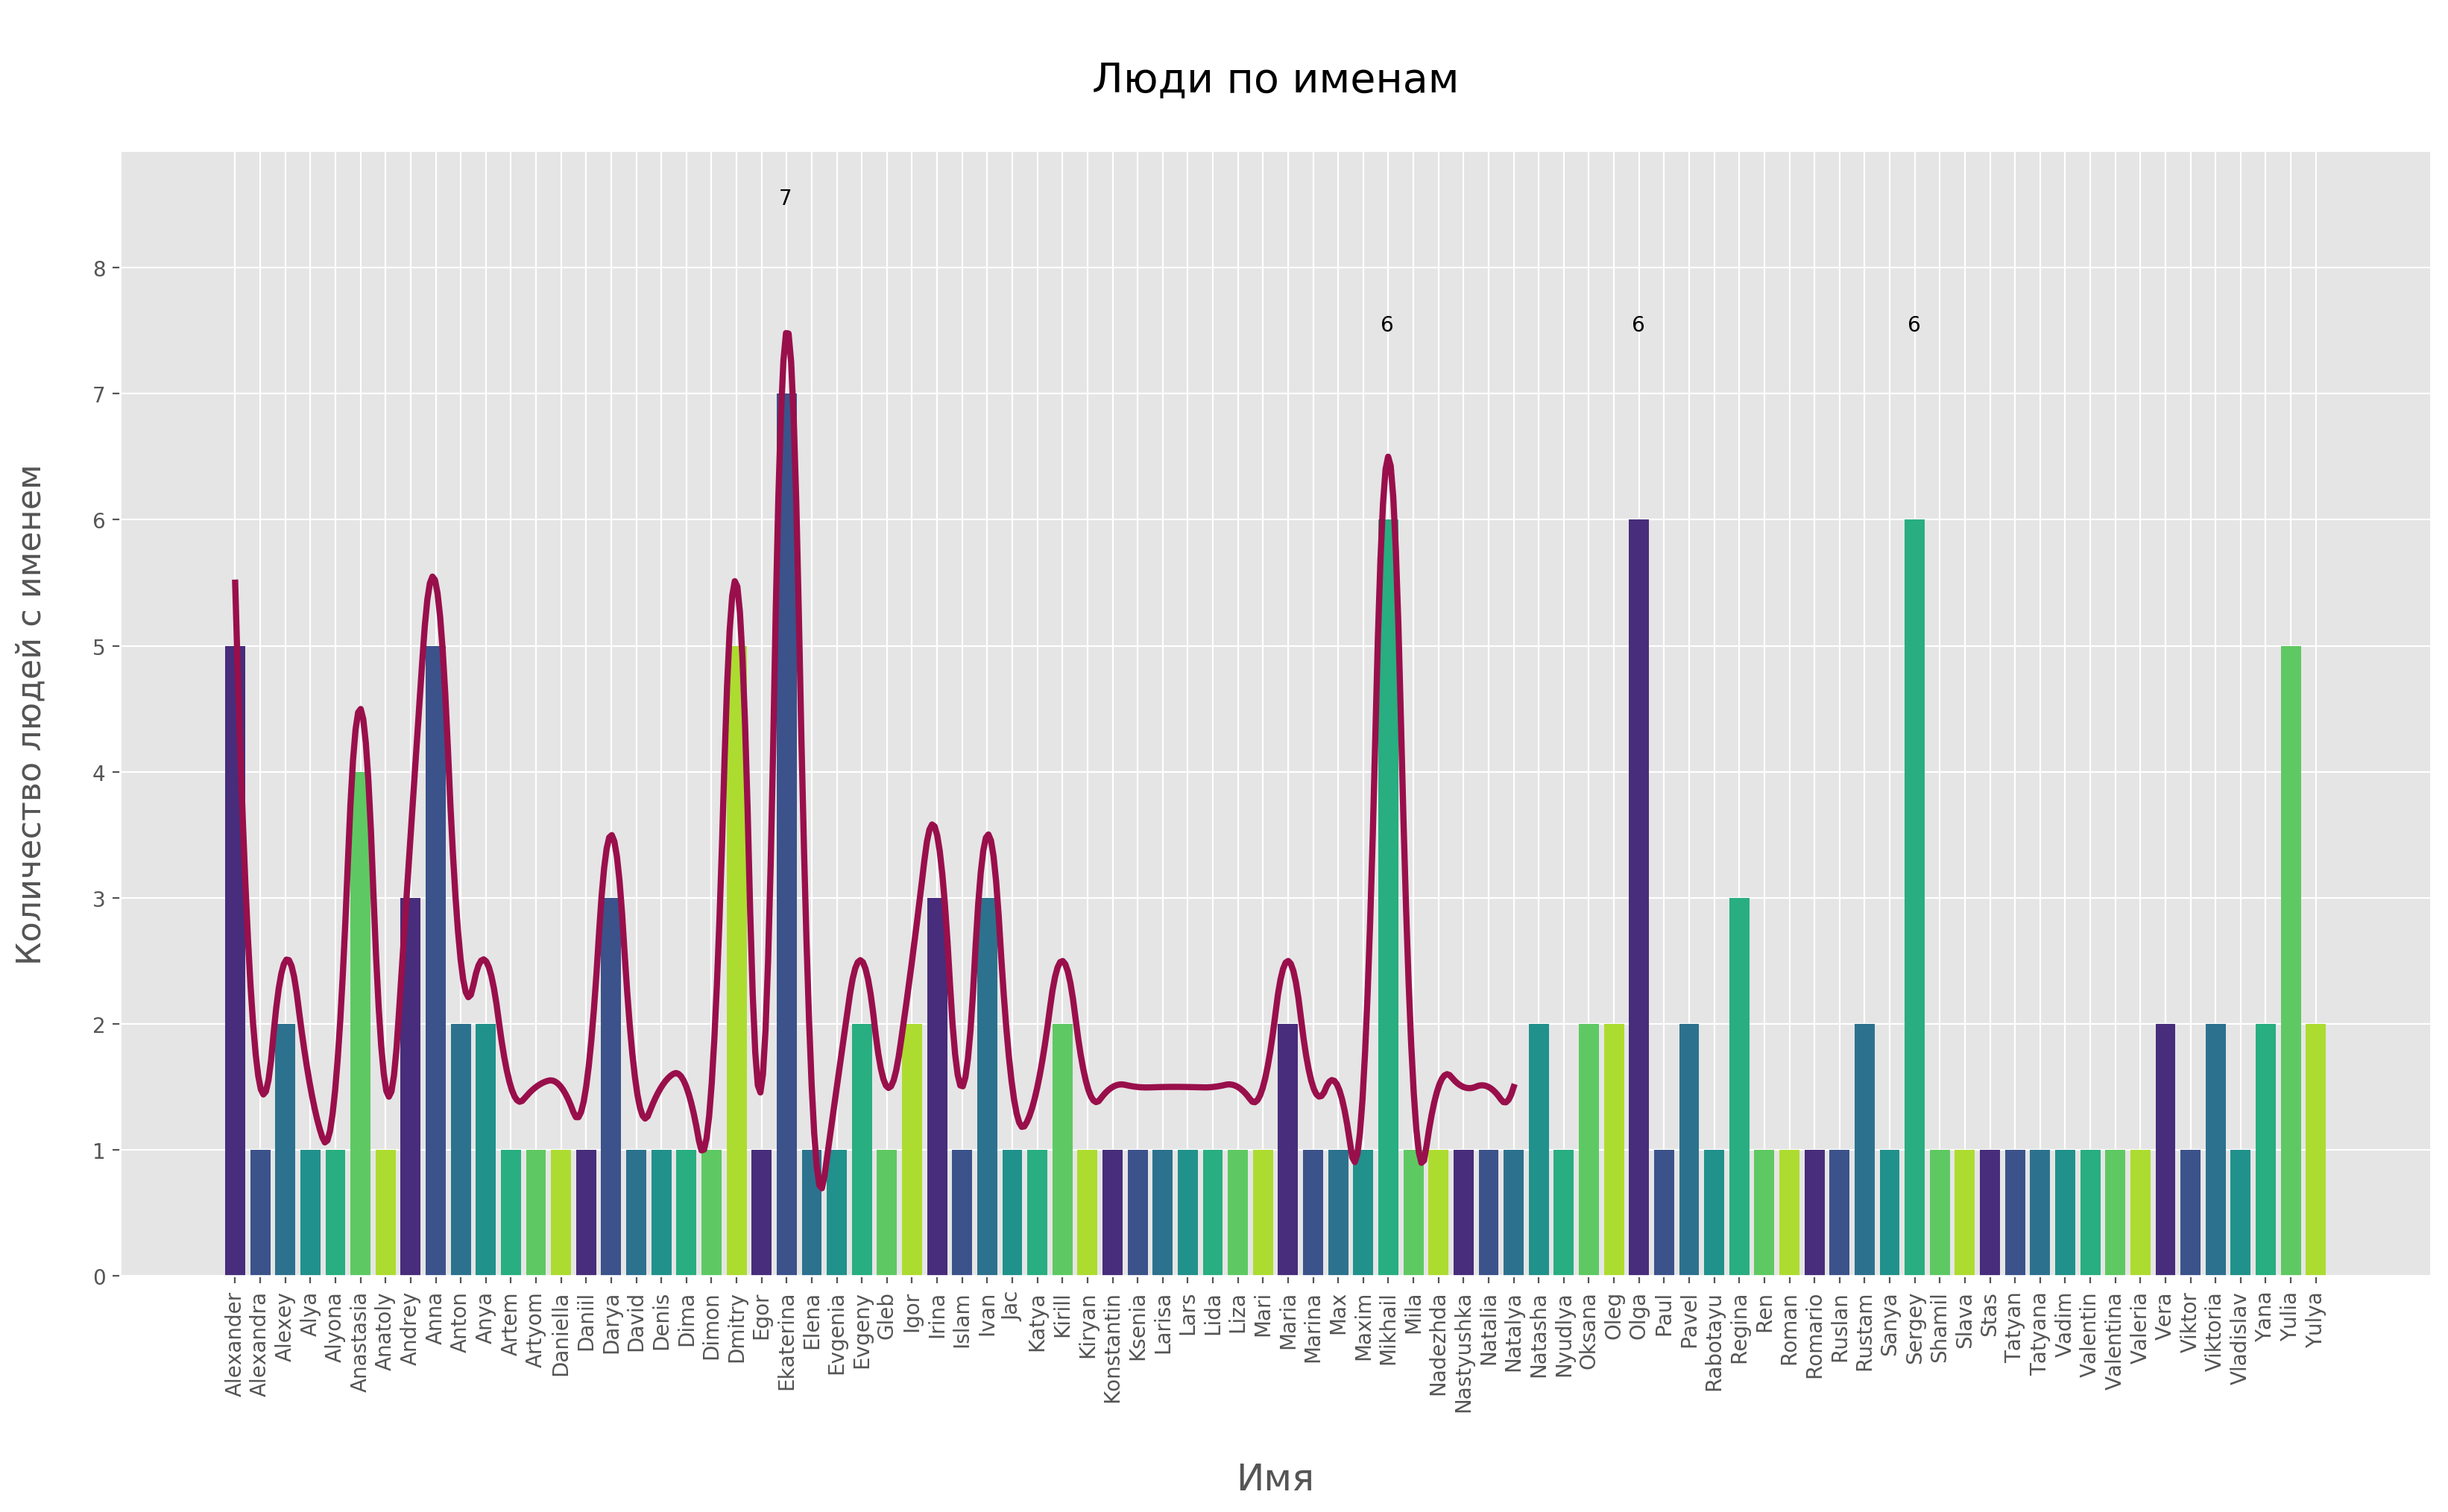

In [40]:
# отсортируем данные по названиям городов
fnames2_nums = [f[1] for f in sorted(fnames2.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
fnames2_labs = sorted([f for f in fnames2]) # подписи по оси x
x = range(len(fnames2_labs)) # данные по оси x

# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', max(fnames2_nums)) 

# кривая со сглаживанием поверх барплота (необязательно)
f = interp1d(x, [x+0.5 for x in fnames2_nums], kind='quadratic')
x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
y_smooth = f(x_new)


plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, fnames2_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')


# рисуем точки максимумов (условных)
for a, b in zip(x, fnames2_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))


plt.title('\nЛюди по именам\n',  fontsize=20)
plt.ylabel('Количество людей с именем\n',  fontsize=16)
plt.xlabel('\nИмя',  fontsize=18)
plt.xticks(x, fnames2_labs, rotation=90)
plt.show()

In [42]:
dictitems = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)


In [43]:
dictis = dict(dictionary)
dictis = {d : dictis[d] for d in dictis if dictis[d] > 2 and len(d) > 2}

# сортируем словарь по значениям 
sorted(dictis.items(), key=lambda x: x[1], reverse=True)

[('https//wwwinstagramcom/foxtvru', 30),
 ('https//bigdigitru/poll/voting/', 30),
 ('https//bigdigitru/poll/voting', 29),
 ('https//vkcc/8OedFO', 18),
 ('предводительницу', 16),
 ('востребованности', 16),
 ('ответственностью', 16),
 ('club31462139|FOX', 16),
 ('Присоединяйтесь', 15),
 ('непредсказуемое', 15),
 ('проголосовавших', 15),
 ('многоканального', 15),
 ('душераздирающим', 15),
 ('комментирования', 15),
 ('многочисленные', 14),
 ('фантастических', 14),
 ('обладательница', 14),
 ('телевизионного', 14),
 ('востребованным', 14),
 ('запоминающаяся', 14),
 ('запоминающимся', 14),
 ('по-настоящему', 13),
 ('Международный', 13),
 ('непоколебимые', 13),
 ('отрицательной', 13),
 ('справедливыми', 13),
 ('Приготовьтесь', 13),
 ('поздравлениям', 13),
 ('маскироваться', 13),
 ('эмоциональный', 13),
 ('ассоциируется', 13),
 ('захватывающих', 13),
 ('Авторизуйтесь', 13),
 ('восхитительны', 13),
 ('предположения', 13),
 ('заразительной', 13),
 ('КОММЕНТАРИЯХ', 12),
 ('настоятельно', 12),
 ('з

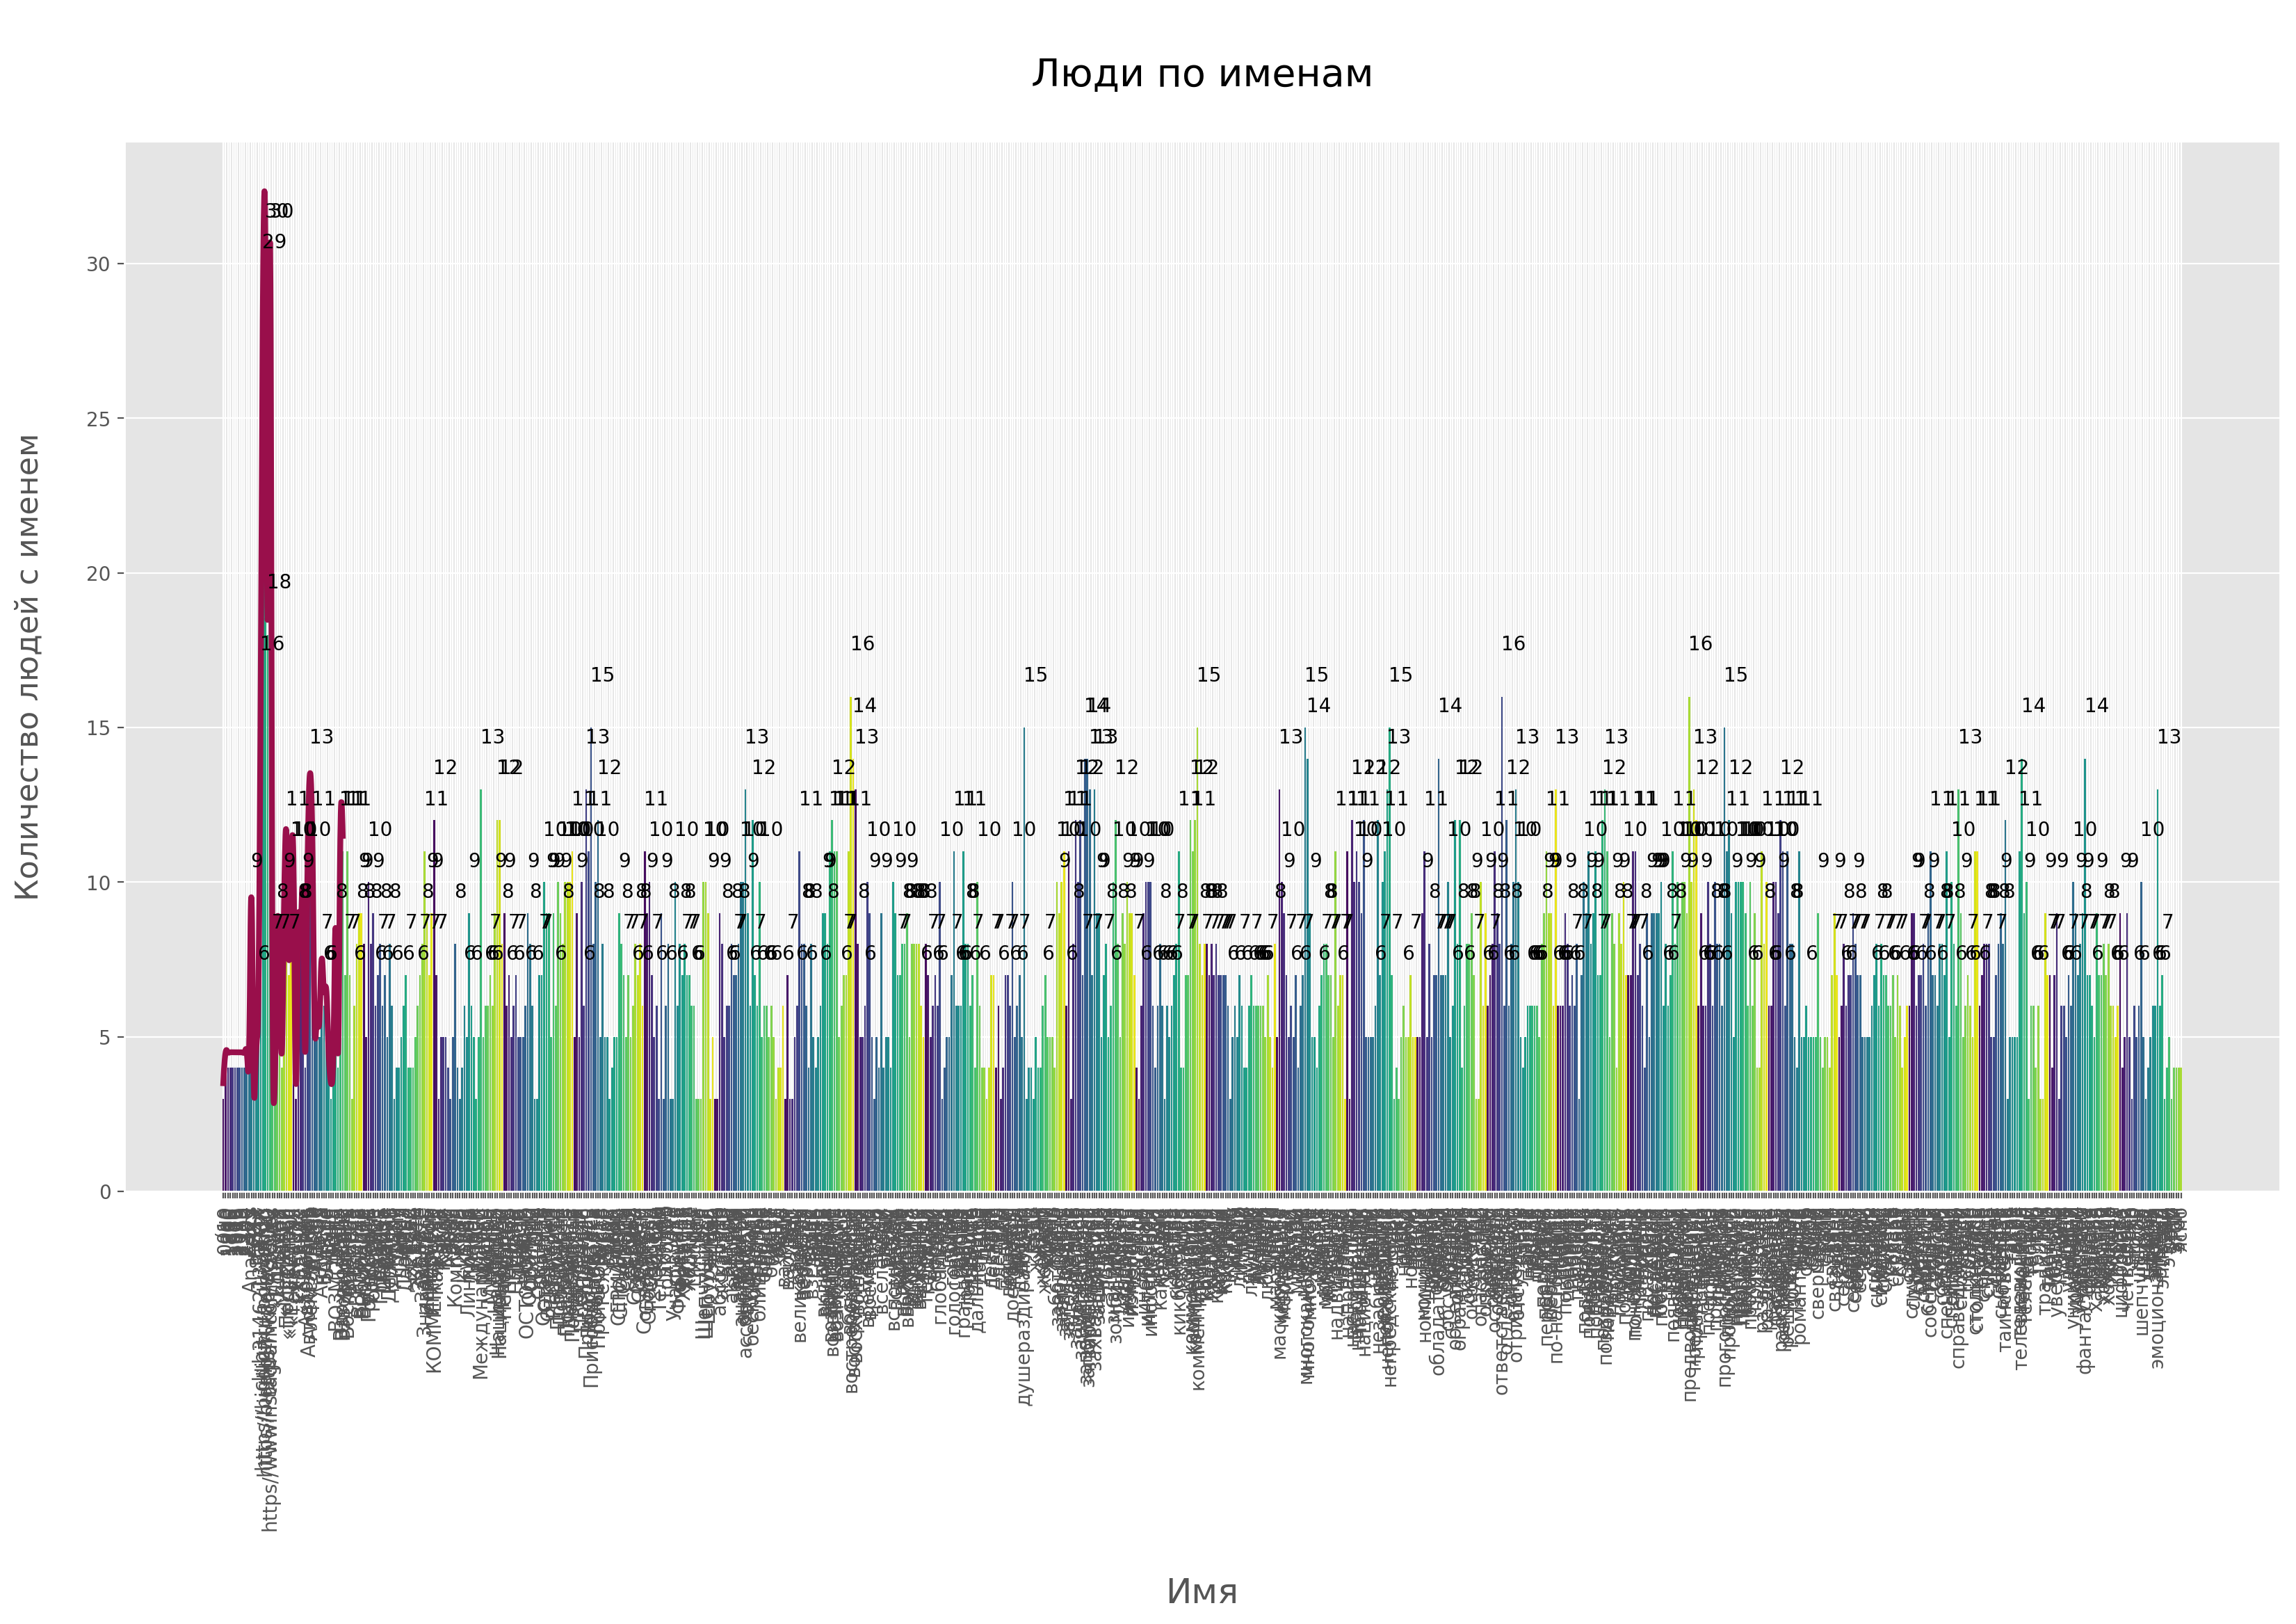

NameError: name 'pylab' is not defined

In [45]:
# отсортируем данные по названиям городов
dictis_nums = [d[1] for d in sorted(dictis.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
dictis_labs = sorted([d for d in dictis]) # подписи по оси x
x = range(len(dictis_labs)) # данные по оси x

# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', max(dictis_nums)) 

# кривая со сглаживанием поверх барплота (необязательно)
f = interp1d(x, [x+0.5 for x in dictis_nums], kind='quadratic')
x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
y_smooth = f(x_new)


plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, dictis_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')


# рисуем точки максимумов (условных)
for a, b in zip(x, dictis_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))


plt.title('\nЛюди по именам\n',  fontsize=20)
plt.ylabel('Количество людей с именем\n',  fontsize=16)
plt.xlabel('\nИмя',  fontsize=18)
plt.xticks(x, dictis_labs, rotation=90)
plt.show()
pylab.savefig('graph.png')

In [12]:
import re
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec

In [13]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [14]:
# ЭТУ ЯЧЕЙКУ ЗАПУСКАТЬ НЕ НАДО

from tqdm import tqdm
from pymystem3 import Mystem
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

m = Mystem()
sw = stopwords.words('russian')

with open('lem4.txt', 'r', encoding='utf8') as f:
    text = f.readlines()

new_lines = []

for line in tqdm(text):
    line = ' '.join([w for w in line.split() if w not in sw])
    newline = ''.join(m.lemmatize(line))
    new_lines.append(newline)
        
with open('lem4_lem.txt', 'w', encoding='utf8') as f1:
    for line in new_lines:
        f1.write(line)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARTEM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.36s/it]


In [15]:
f = 'lem4_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

In [16]:
%time model_lem4 = gensim.models.Word2Vec(data, size=300, window=5, min_count=2, workers=2)

C:\ANACONDA-3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
2019-05-04 23:40:21,061 : INFO : collecting all words and their counts
2019-05-04 23:40:21,062 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-04 23:40:21,064 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-04 23:40:21,065 : INFO : collected 498 word types from a corpus of 898 raw words and 1 sentences
2019-05-04 23:40:21,066 : INFO : Loading a fresh vocabulary
2019-05-04 23:40:21,067 : INFO : effective_min_count=2 retains 150 unique words (30% of original 498, drops 348)
2019-05-04 23:40:21,068 : INFO : effective_min_count=2 leaves 550 word corpus (61% of original 898, drops 348)
2019-05-04 23:40:21,070 : INFO : deleting the raw counts dictionary of 498 items
2019-05-04 23:40:21,071 : I

Wall time: 700 ms


In [17]:
model_lem4.init_sims(replace=True)
model_path = "lem4.bin"

print("Saving model...")
model_lem4.wv.save_word2vec_format(model_path, binary=True)

2019-05-04 23:40:22,604 : INFO : precomputing L2-norms of word weight vectors


Saving model...


2019-05-04 23:40:22,608 : INFO : storing 150x300 projection weights into lem4.bin
2019-05-04 23:40:22,609 : WARNING : this function is deprecated, use smart_open.open instead


In [18]:
print(len(model_lem4.wv.vocab))

150


In [19]:
print(sorted([w for w in model_lem4.wv.vocab]))

['МСК', 'а', 'авторизоваться', 'актер', 'альфа', 'большой', 'быть', 'в', 'ваш', 'вернуться', 'весь', 'вид', 'возвращение', 'возможный', 'вопрос', 'воскресение', 'временный', 'время', 'все', 'вселенная', 'входить', 'выбирать', 'выживать', 'выходной', 'героиня', 'герой', 'год', 'голос', 'голосовать', 'готовый', 'давать', 'делиться', 'день', 'думать', 'дэрил', 'если', 'ждать', 'желать', 'жизнь', 'жить', 'заглядывать', 'замечать', 'заниматься', 'и', 'изменяться', 'именно', 'каждый', 'как', 'канал', 'комментарий', 'компания', 'конкурс', 'который', 'кудлиц', 'кэрол', 'лорен', 'любимый', 'мертвец', 'мишон', 'мнение', 'мой', 'момент', 'мужчина', 'называть', 'насколько', 'настоятельно', 'настоящий', 'находить', 'национальный', 'наш', 'но', 'новость', 'новый', 'номинация', 'номинировать', 'ночь', 'обсуждать', 'обсуждение', 'община', 'оружие', 'оставаться', 'оставлять', 'осторожно', 'отличный', 'очень', 'пакет', 'первый', 'переходить', 'персонаж', 'писать', 'победа', 'повлиять', 'повтор', 'поддер

In [20]:
lemmat = open('lem4_lem.txt','r',encoding='utf-8-sig')
lemmat = lemmat.read()
lemmat = lemmat.split()
#print(lemmat)

lemmat = Counter(lemmat)
print(lemmat)


Counter({'ходячий': 31, 'мертвец': 21, 'комментарий': 18, 'сериал': 13, 'новый': 12, 'серия': 11, 'сегодня': 8, 'вернуться': 8, 'телеканал': 8, 'в': 7, 'который': 7, 'как': 7, 'свой': 7, 'хороший': 7, 'день': 6, 'голосовать': 6, 'давать': 5, 'смотреть': 5, 'МСК': 5, 'момент': 5, 'это': 5, 'ваш': 5, 'шептаться': 5, 'каждый': 5, 'самый': 5, 'февраль': 5, 'выживать': 5, 'возвращение': 5, 'сезон': 5, 'поддерживать': 5, 'номинация': 5, 'писать': 4, 'осторожно': 4, 'возможный': 4, 'пропускать': 4, 'посмотреть': 4, 'конкурс': 4, 'быть': 4, 'альфа': 4, 'первый': 4, 'любимый': 4, 'проголосовать': 4, 'если': 3, 'эпизод': 3, 'настоятельно': 3, 'рекомендовать': 3, 'заглядывать': 3, 'повтор': 3, 'воскресение': 3, 'ночь': 3, 'такой': 3, 'мишон': 3, 'и': 3, 'участвовать': 3, 'страница': 3, 'последний': 3, 'вопрос': 3, 'временный': 3, 'скачок': 3, 'скоро': 3, 'жизнь': 3, 'мнение': 3, 'дэрил': 3, 'герой': 3, 'выбирать': 3, 'эмодзи': 3, 'победа': 3, 'просто': 3, 'община': 3, 'время': 3, 'делиться': 3, '

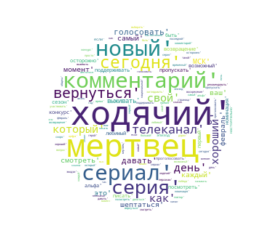

In [21]:
lemmat = dict(lemmat)
lemmat = {l : lemmat[l] for l in lemmat if lemmat[l] > 2 and len(l) > 2}

# сортируем словарь по значениям
sorted(lemmat.items(), key=lambda x: x[1], reverse=True)

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(str(sorted(lemmat.items(), key=lambda x: x[1], reverse=True)))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [22]:
# отсортируем данные по названиям городов
lemmat_nums = [l[1] for l in sorted(lemmat.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
lemmat_labs = sorted([lem for lem in lemmat]) # подписи по оси x
x = range(len(lemmat_labs)) # данные по оси x

In [23]:
import matplotlib
import matplotlib.cm as cm

# переведем абсолютные значения в проценты (просто так :)
total = sum(lemmat_nums)
lemmat_percent = [num/total*100 for num in lemmat_nums]

norm = matplotlib.colors.Normalize(vmin=min(x), vmax=max(x)//10, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='PuBuGn')

colors = [mapper.to_rgba(v) for v in lemmat_percent]

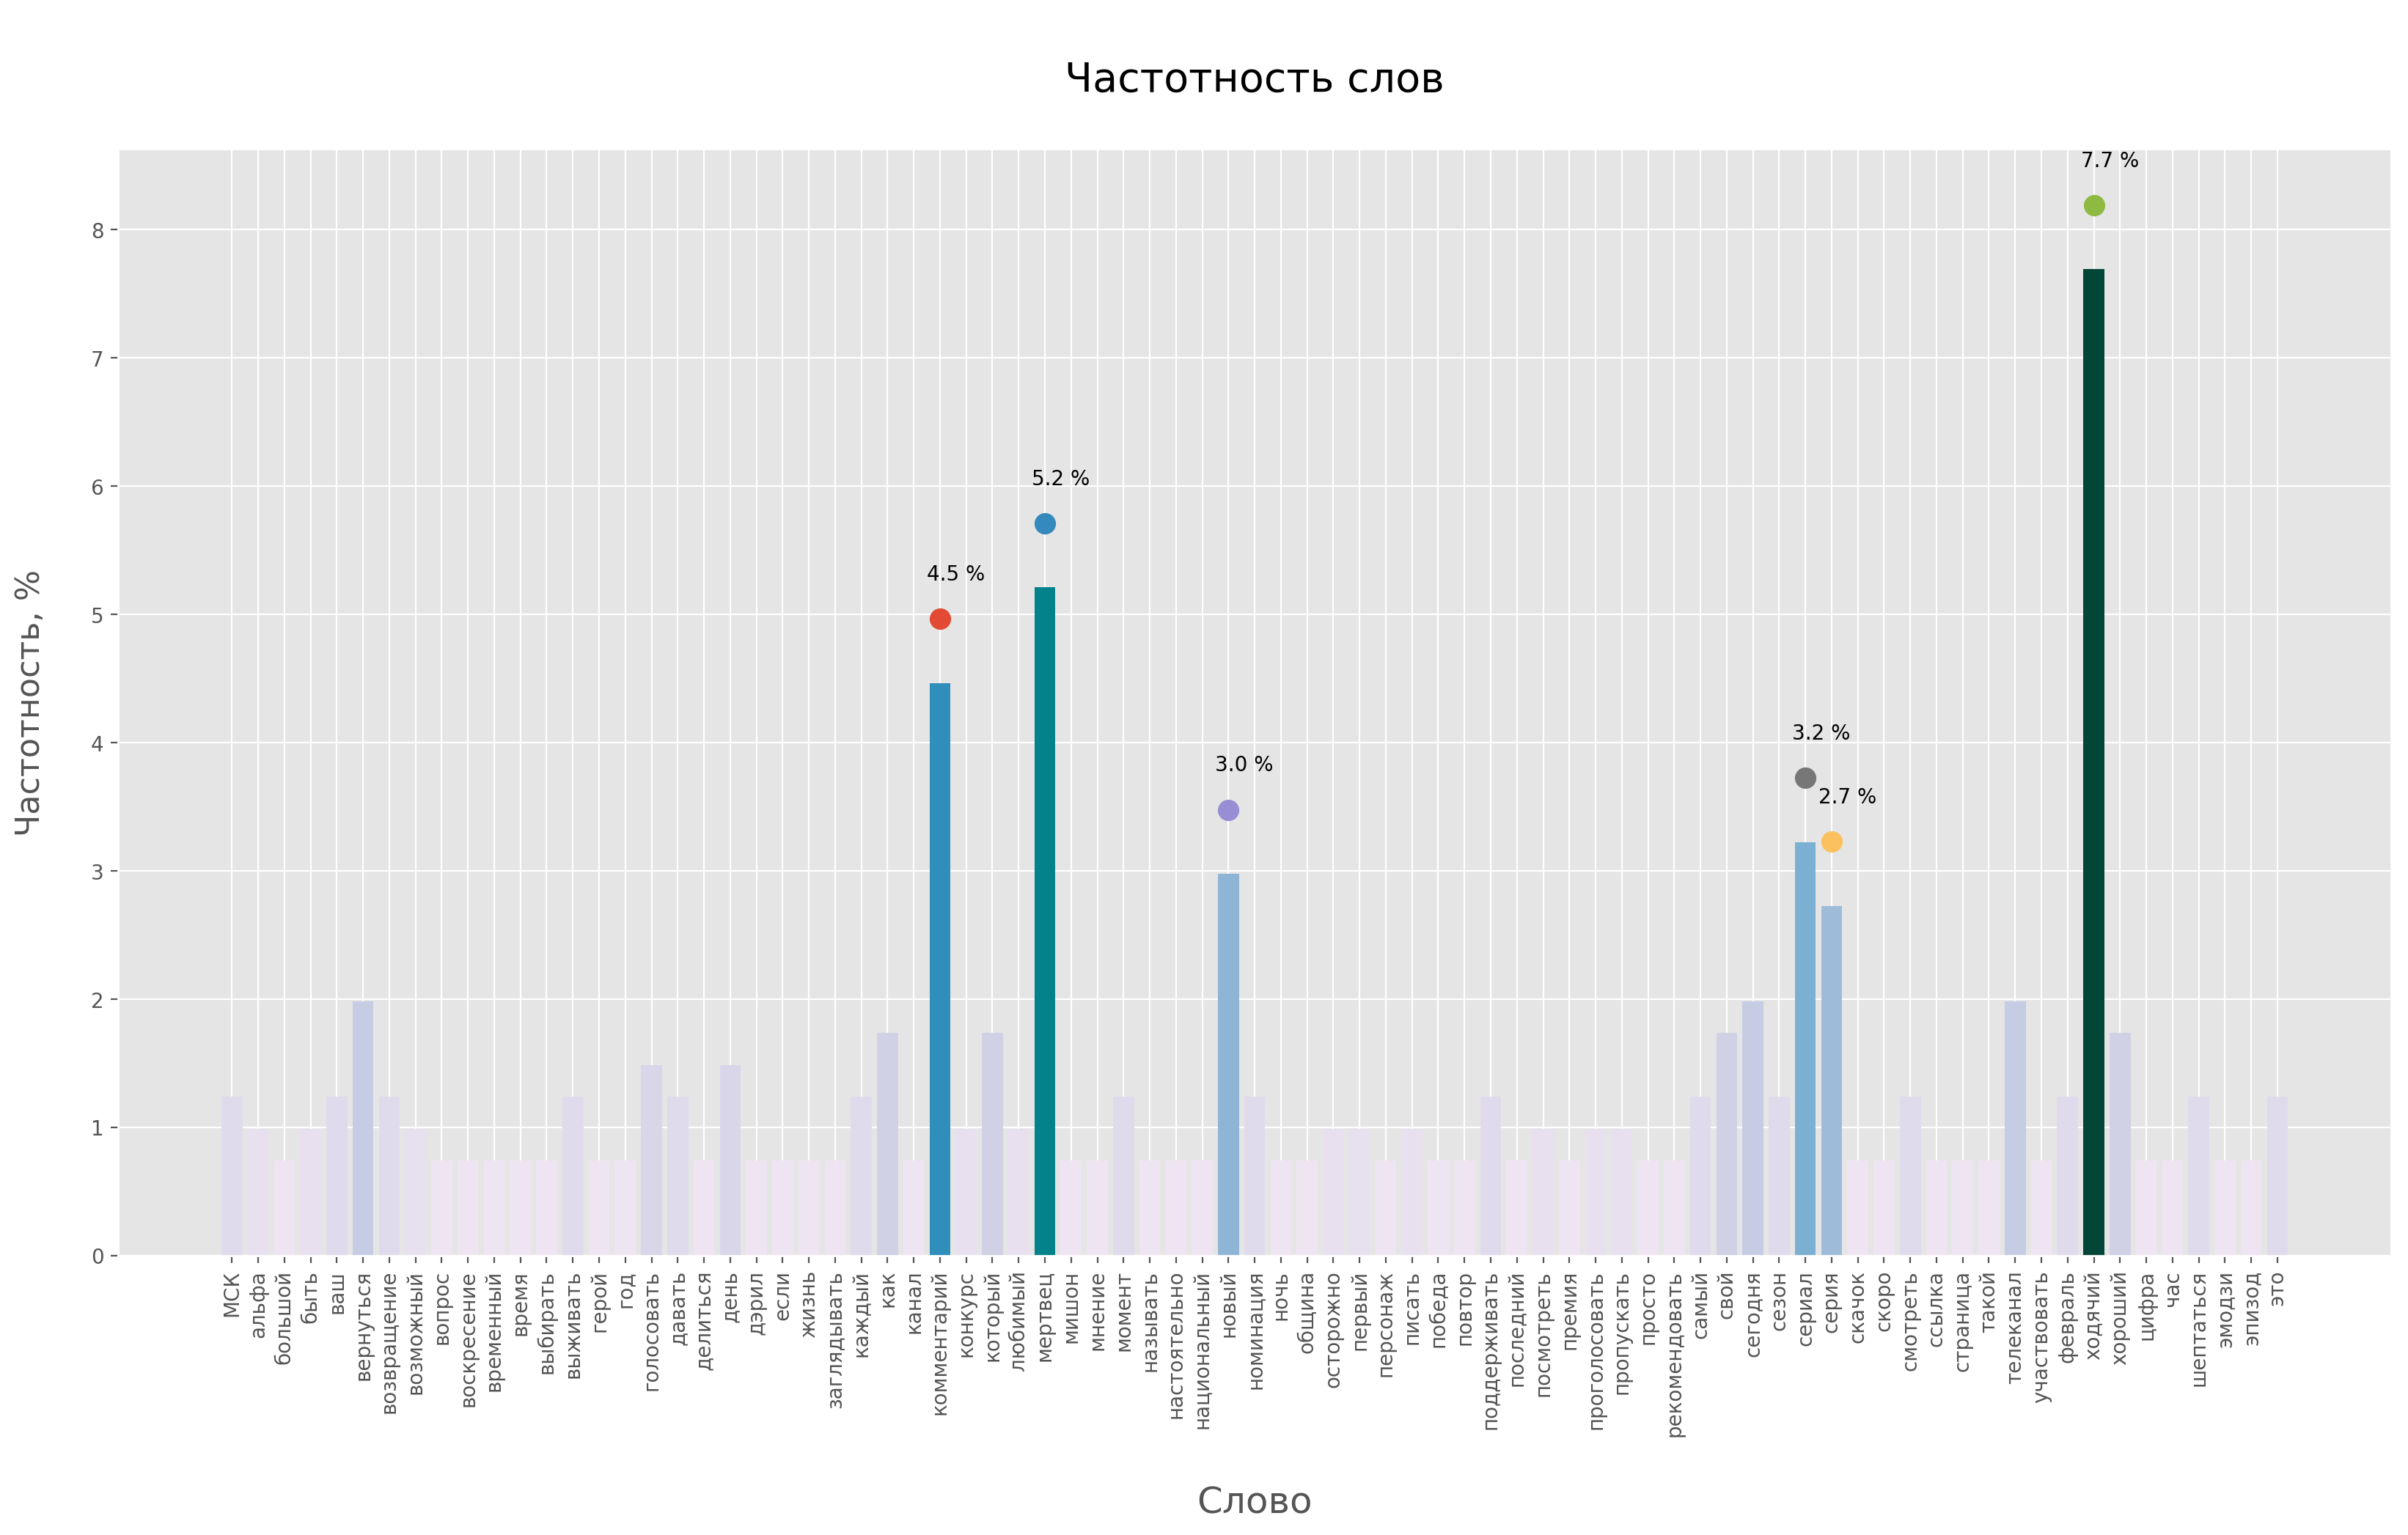

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, lemmat_percent, color=colors)

# рисуем точки максимумов (условных)
for a, b in zip(x, lemmat_percent):
    if b > 2:
        plt.scatter(a, b+0.5, s=100)
        plt.text(a-0.5, b+0.8, '%.1f %%' % (b))


plt.title('\nЧастотность слов\n',  fontsize=20)
plt.ylabel('Частотность, %\n',  fontsize=16)
plt.xlabel('\nСлово',  fontsize=18)
plt.xticks(x, lemmat_labs, rotation=90)
plt.show()
plt.savefig('sample.pdf')

In [25]:
unlemmat = open('lem4.txt','r',encoding='utf-8-sig')
unlemmat = unlemmat.read()
unlemmat = unlemmat.split()
#print(lemmat)

unlemmat = Counter(unlemmat)
print(unlemmat)


Counter({'в': 68, 'на': 40, 'и': 27, 'Ходячих': 20, 'с': 16, 'что': 15, 'не': 15, 'мертвецов': 13, 'как': 12, 'вы': 11, 'комментариях': 10, 'Ходячие': 9, 'за': 9, 'мертвецы': 8, 'В': 7, 'сегодня': 7, 'Как': 7, 'о': 7, 'по': 6, 'к': 6, 'всех': 6, 'вернутся': 6, 'все': 5, 'МСК': 5, 'вас': 5, 'это': 5, 'больше': 5, 'мы': 5, 'номинации': 5, 'будет': 4, 'после': 4, 'ОСТОРОЖНО': 4, 'КОММЕНТАРИЯХ': 4, 'ВОЗМОЖНЫ': 4, 'посмотреть': 4, 'день': 4, 'серии': 4, 'у': 4, 'февраля': 4, 'так': 4, 'любимый': 4, 'Телеканал': 4, 'сериалов': 4, 'можно': 4, 'то': 3, 'Давайте': 3, 'со': 3, 'Пишите': 3, 'Если': 3, 'пропустили': 3, 'новый': 3, 'эпизод': 3, 'настоятельно': 3, 'рекомендуем': 3, 'заглядывать': 3, 'комментарии': 3, 'повтор': 3, 'воскресенье': 3, 'ночью': 3, 'только': 3, 'этот': 3, 'Мишон': 3, 'И': 3, 'Участвуйте': 3, 'конкурсе': 3, 'странице': 3, 'его': 3, 'скоро': 3, 'ваш': 3, 'ее': 3, 'том': 3, 'Новая': 3, 'серия': 3, 'эмодзи': 3, 'свои': 3, 'просто': 3, 'время': 3, 'выживших': 3, 'Делитесь': 3,

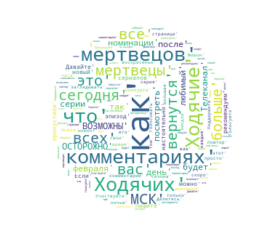

In [26]:
unlemmat = dict(unlemmat)
unlemmat = {u : unlemmat[u] for u in unlemmat if unlemmat[u] > 2 and len(u) > 2}

# сортируем словарь по значениям
sorted(unlemmat.items(), key=lambda x: x[1], reverse=True)

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(str(sorted(unlemmat.items(), key=lambda x: x[1], reverse=True)))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [27]:
# отсортируем данные по названиям городов
unlemmat_nums = [u[1] for u in sorted(unlemmat.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
unlemmat_labs = sorted([unlem for unlem in unlemmat]) # подписи по оси x
x = range(len(unlemmat_labs)) # данные по оси x

In [28]:
import matplotlib
import matplotlib.cm as cm

# переведем абсолютные значения в проценты (просто так :)
total = sum(unlemmat_nums)
unlemmat_percent = [num/total*100 for num in unlemmat_nums]

norm = matplotlib.colors.Normalize(vmin=min(x), vmax=max(x)//10, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='PuBuGn')

colors = [mapper.to_rgba(v) for v in unlemmat_percent]

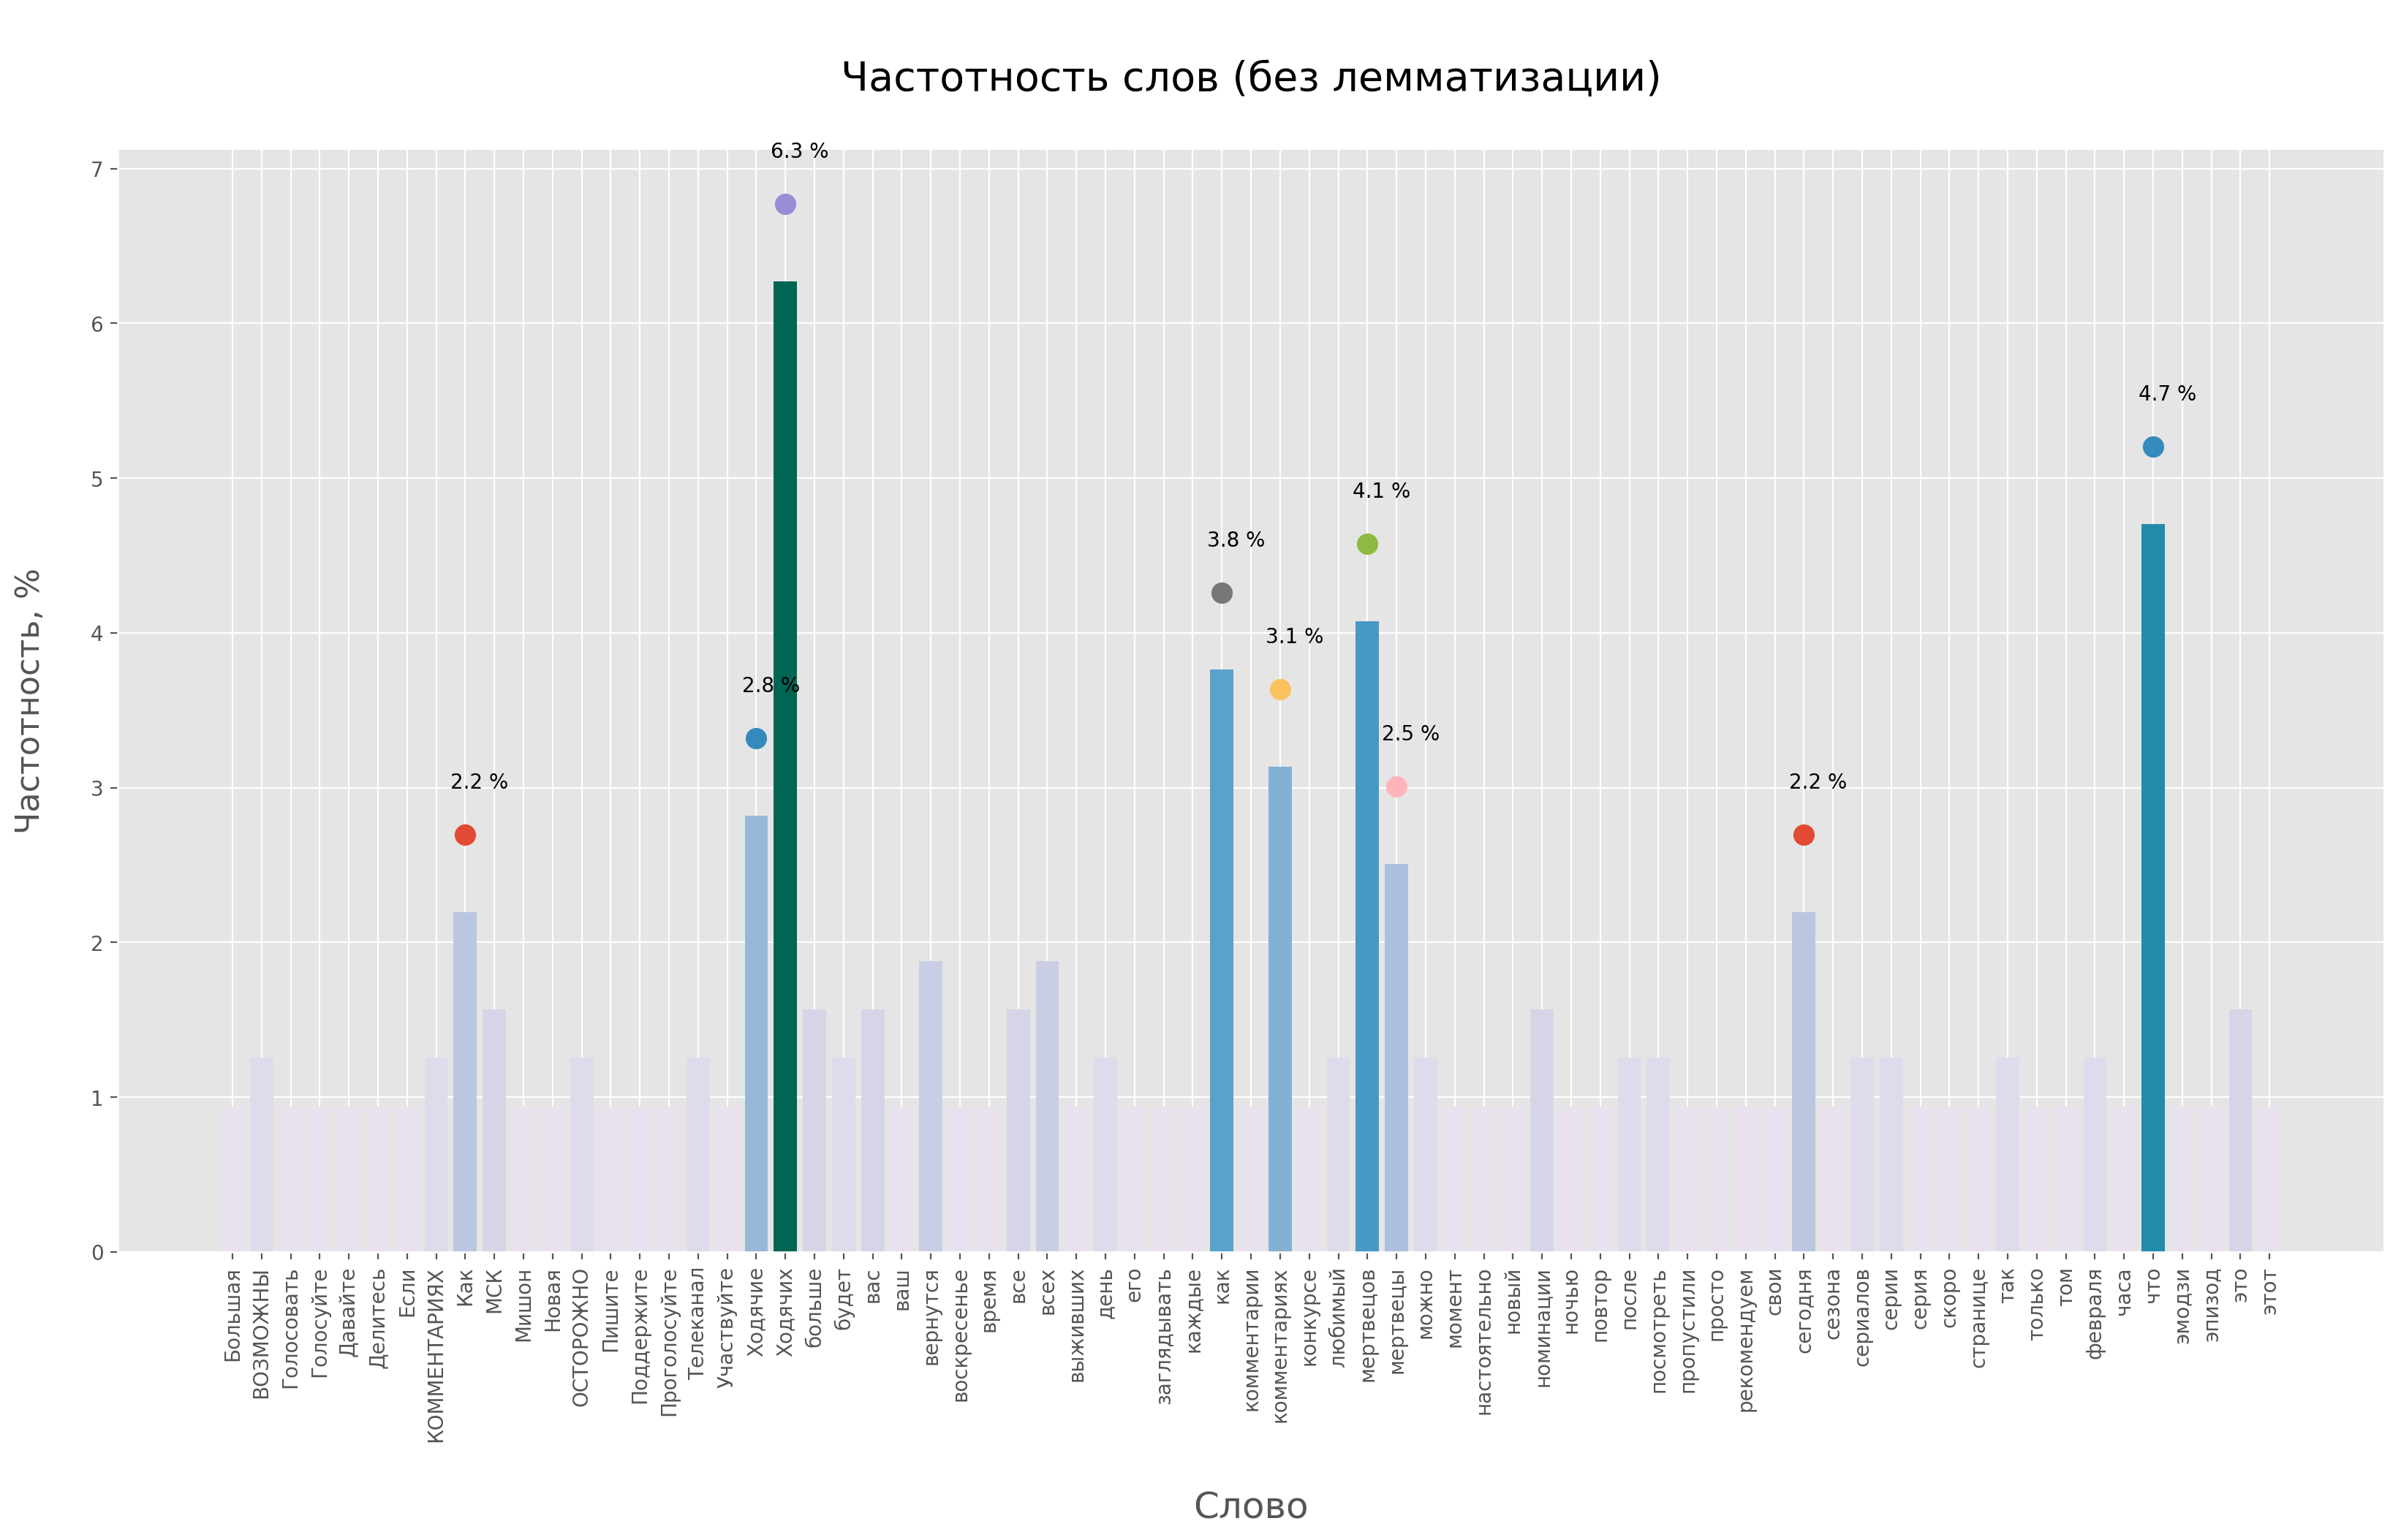

In [29]:
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, unlemmat_percent, color=colors)

# рисуем точки максимумов (условных)
for a, b in zip(x, unlemmat_percent):
    if b > 2:
        plt.scatter(a, b+0.5, s=100)
        plt.text(a-0.5, b+0.8, '%.1f %%' % (b))


plt.title('\nЧастотность слов (без лемматизации)\n',  fontsize=20)
plt.ylabel('Частотность, %\n',  fontsize=16)
plt.xlabel('\nСлово',  fontsize=18)
plt.xticks(x, unlemmat_labs, rotation=90)
plt.show()
#plt.savefig('sample.pdf')